# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [29]:
conda install -c districtdatalabs yellowbrick

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0




In [30]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

## Loading the dataset

In [31]:
#loading the dataset
data = pd.read_csv("C:/Users/Cooldream/Downloads/stock_data.csv")

## Overview of the Dataset

In [32]:
#Shape of Dataframe
data.shape

(340, 15)

In [33]:
#Summary of Dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Observations**:

1. The data consists of 15 columns and 340 rows.
2. The data has 11 numerical columns with 7 as type (float) and 4 as type (int).
3. The data has 4 objects which can be changed to 'categorical' columns in subsequent steps.
4. All the columns of database show 340 non-null values which indicate no data is missing from any columns.

In [34]:
#Copy of the data
data1 = data.copy()

### Fixing the data types

In [35]:
# lets convert object to categorical columns to reduce the space
data1.columns[data1.dtypes=='object'] # select columns which are object 

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry'], dtype='object')

In [36]:
#lets convert object to categorical columns to reduce the space
for column in data1.columns[data1.dtypes=='object']:
    data1[column] = data1[column].astype('category')

In [37]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Ticker Symbol                 340 non-null    category
 1   Security                      340 non-null    category
 2   GICS Sector                   340 non-null    category
 3   GICS Sub Industry             340 non-null    category
 4   Current Price                 340 non-null    float64 
 5   Price Change                  340 non-null    float64 
 6   Volatility                    340 non-null    float64 
 7   ROE                           340 non-null    int64   
 8   Cash Ratio                    340 non-null    int64   
 9   Net Cash Flow                 340 non-null    int64   
 10  Net Income                    340 non-null    int64   
 11  Earnings Per Share            340 non-null    float64 
 12  Estimated Shares Outstanding  340 non-null    floa

The data1 is converted to categorical variables and memory is increased to 58.1kb from 40kb, 
therefore will work with object variables only.

### Displaying few rows of the dataset

In [38]:
# let's view a sample of the data
data.sample(n=5, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102

In [39]:
#First 5 rows
data.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [40]:
#Last 5 rows
data.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [41]:
# Statisitical summary of all the data
data.describe(include="all").T

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327937   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

**Observations**:
1. The Ticker symbol and security represents same company and have 340 unique values.
2. Most prominent Global Industry Classification Standard (GICS) sector is out of 11 sectors is 
industrials with frequency of 53.
3. Most prominent Global Industry Classification Standard (GICS) sub industry is "Oil and gas industry".
4. The P/E ratio is range from 2.9 to 528.03 but 75% of data lies below 31.764.
5. The P/B ratio is range from -76.12 to 129.06 with median of -1.06 and mean of -1.7.
6. The Price Change range from -47% to 55% where median and mean are quite close.
7. The min Current Price for security is 4.5 and maximum is 1274.
8. The ROE mean is 96.5 which quite higher than median of 15, and 3rd quantile value of 27.
9. Quite similar to ROE, Cash Ratio mean is 70 is higher than median of 47 but lower than 3rd quantile value of 99.
10. The negative net cash flow and net income shows many companies are incurring losses and atleast 25% of companies have cash flow less than 0. 
11. The mean and median of Earnings per share - EPS are quite close and distribution range from -61 to 50.
12. The mean of estimated outstanding shares is quite close 75% quantile value of the distribution.
13. The mean of P/E ratio is quite close to 75% quantile value of distribution.
14.  The mean (-1.7) and median (-1.06) of P/B ratio distribution are quite close. 

In [42]:
# Null Values in Dataframe
data.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [43]:
# Duplicate Values in Dataframe
data.duplicated().sum()
print('Total number of duplicate values are:', data.duplicated().sum())

data.duplicated().value_counts()

Total number of duplicate values are: 0


False    340
dtype: int64

**Observation**:

There are no duplicate or null values in the dataset rows.


**Ticker and Security are duplicate columns with exactly same information and one column can be dropped**

In [44]:
#Dropping Security column from dataset
df=data.drop(['Security'], axis=1)

In [45]:
#checking frist 5 rows for df dataset
df.head(5)

Ticker Symbol             GICS Sector      GICS Sub Industry  Current Price  \
0           AAL             Industrials               Airlines      42.349998   
1          ABBV             Health Care        Pharmaceuticals      59.240002   
2           ABT             Health Care  Health Care Equipment      44.910000   
3          ADBE  Information Technology   Application Software      93.940002   
4           ADI  Information Technology         Semiconductors      55.320000   

   Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  \
0      9.999995    1.687151  135          51     -604000000  7610000000   
1      8.339433    2.197887  130          77       51000000  5144000000   
2     11.301121    1.273646   21          67      938000000  4423000000   
3     13.977195    1.357679    9         180     -240840000   629551000   
4     -1.827858    1.701169   14         272      315120000   696878000   

   Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0               11.39                  6.681299e+08    3.718174  -8.784219  
1                3.15                  1.633016e+09   18.806350  -8.750068  
2                2.94                  1.504422e+09   15.275510  -0.394171  
3                1.26                  4.996437e+08   74.555557   4.199651  
4                0.31                  2.247994e+09  178.451613   1.059810

### Unique values of all the categories

In [46]:
# list of all categorical columns
df.columns[df.dtypes=='object']
#objectdf = df.select_dtypes(include="object").columns.tolist()


Index(['Ticker Symbol', 'GICS Sector', 'GICS Sub Industry'], dtype='object')

In [47]:
objectdf = ['GICS Sector', 'GICS Sub Industry']
objectdf

['GICS Sector', 'GICS Sub Industry']

In [48]:
for column in objectdf:
  print('Unique values of',column,':')
  #print(df[column] .unique())
  print(df[column].value_counts())
  print('..................'*5)

Unique values of GICS Sector :
Industrials                    53
Financials                     49
Health Care                    40
Consumer Discretionary         40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS Sector, dtype: int64
..........................................................................................
Unique values of GICS Sub Industry :
Oil & Gas Exploration & Production                 16
REITs                                              14
Industrial Conglomerates                           14
Electric Utilities                                 12
Internet Software & Services                       12
Health Care Equipment                              11
MultiUtilities                                     11
Banks                                              10
Pro

**Observations**:
    
1. The Industrials (59) Financials (49), health care (40),  consumer discretionary (40), Information tehcnology (33) 
are top 5 GICS sectors capturing 221 out total 340 securities.
2. The top 9 GICS Sub Industry actually capture (108) 31% of total securities.                                    


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate Analysis

### Plot the distribution plots for all the numerical features

In [49]:
#plot count 
def hist_box(data, column):
    
    #subplots of histogram and boxplot
    fig, (ax_hist, ax_box) = plt.subplots(2 , figsize = (13, 6), gridspec_kw={"height_ratios": (0.7, 0.3)})
    #plotting the title of graphs
    fig.suptitle(column)
    # plotting histogram 
    sns.histplot(data=data, x = column, ax=ax_hist, kde = True ) #plotting on first axis 
    
    #plotting mean line in histogram
    Mean=data[column].mean()
    ax_hist.axvline(x = Mean, color ='orange', linestyle="--") #plotting mean line on first axis
    
    #plotting Boxplot
    sns.boxplot(data = data, x=column, ax=ax_box, showfliers=True, color = 'yellow') #plotting on 2nd axis
    plt.show()

In [50]:
def bar_plot(data, column): 
    
    plt.figure(figsize = (5,3))  
    plt.title( column , loc = 'center', fontsize = 13) # Plot title on top of plot

    # plot the countplot for distribution 
    sns.countplot(data = df, x = column, palette = 'Set2')
    plt.xticks(rotation=90)
    plt.show()
    
    print('************' *10)
    print(data[column].value_counts().head(6))


**`Current Price`**

**What does the distribution of stock prices look like?**

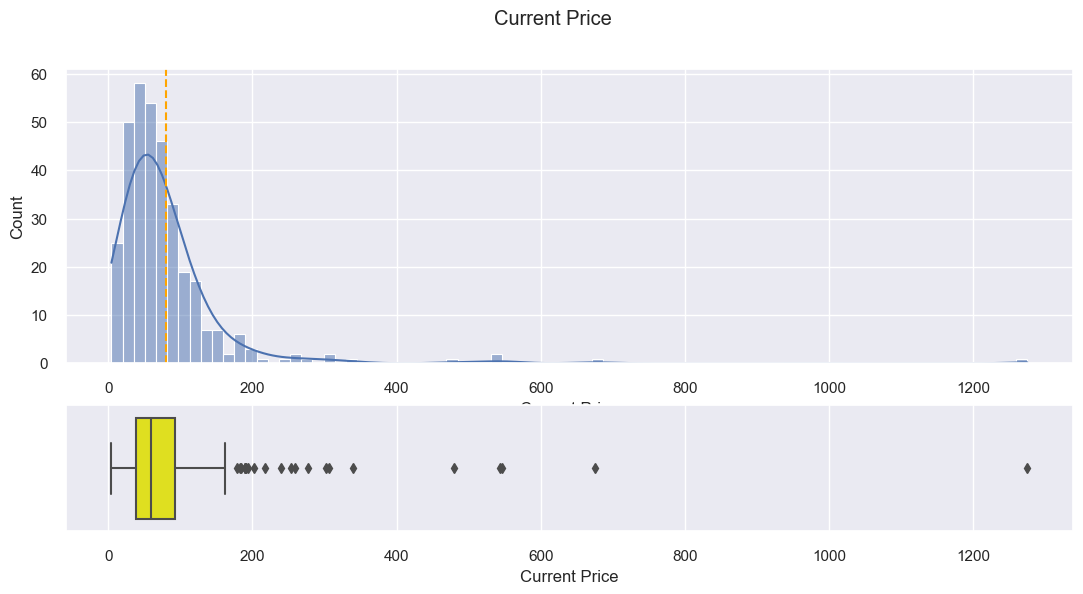

In [51]:
#plot for Current Price
hist_box(df, 'Current Price')

In [52]:
df160 = df[df['Current Price'] < 160]
df160.shape

(317, 14)

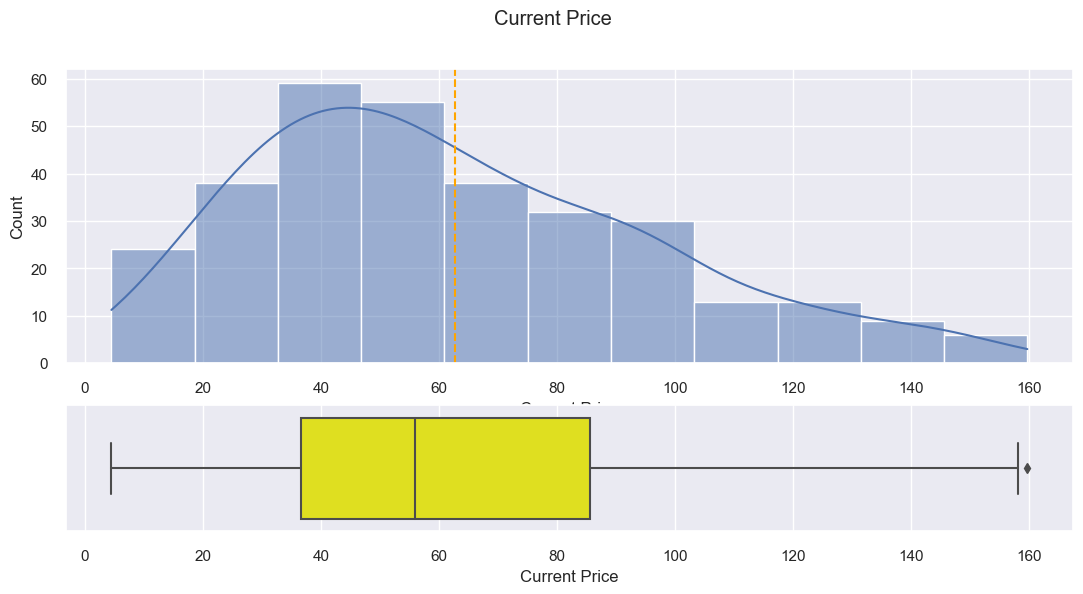

In [53]:
hist_box(df160,'Current Price')

**Observation**:

1. The distribution of current price for df heavily right skewed with atleast 24 securities higher than 160.
2. There are lot of outliers present on higher end distribution.
3. the distribution of df160 is equally right skewed with just one outlier in the dataset.

**`Price Change`**

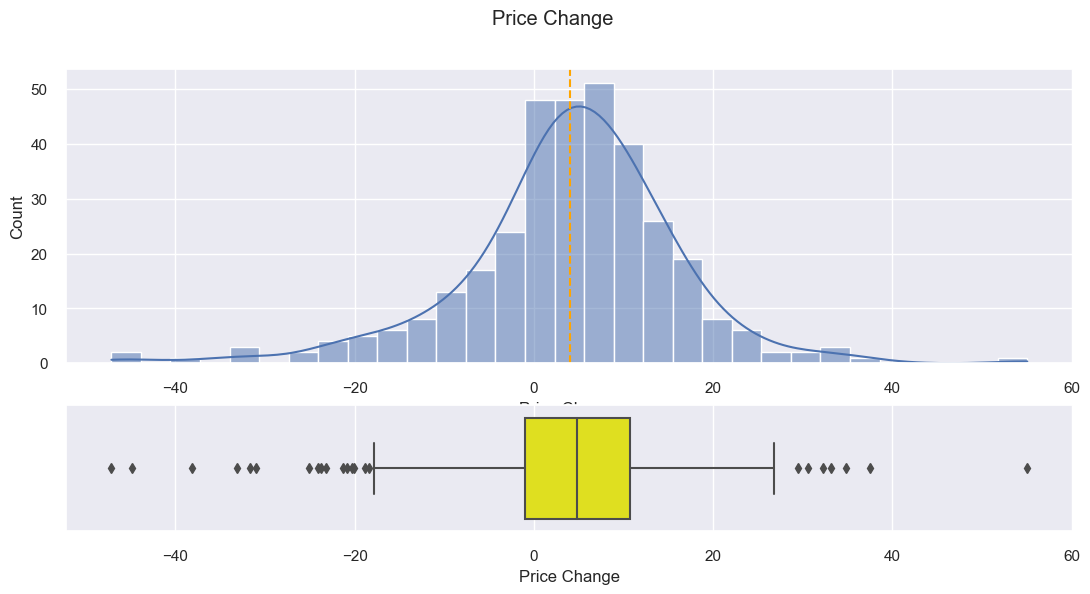

In [54]:
#plot for Price Change
hist_box(df, 'Price Change')

**Observation**:

1. The distribution of price change is quite normally distributed from -47% to 55% within span of 13 weeks.
2. There are lot of outliers present on both end of distribution.

**`Volatility`**

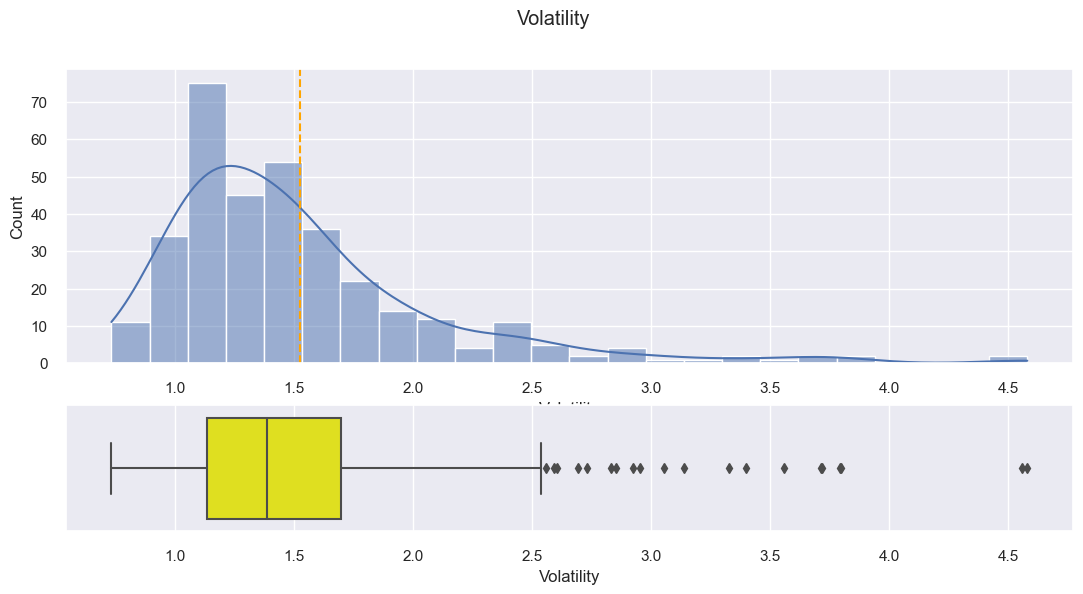

In [55]:
#plot for Volatility
hist_box(df, 'Volatility')

**Observation**:

1. The distribution of volatility heavily right skewed.
2. There are lot of outliers present with volatility higher than 2.5.

**`ROE`**

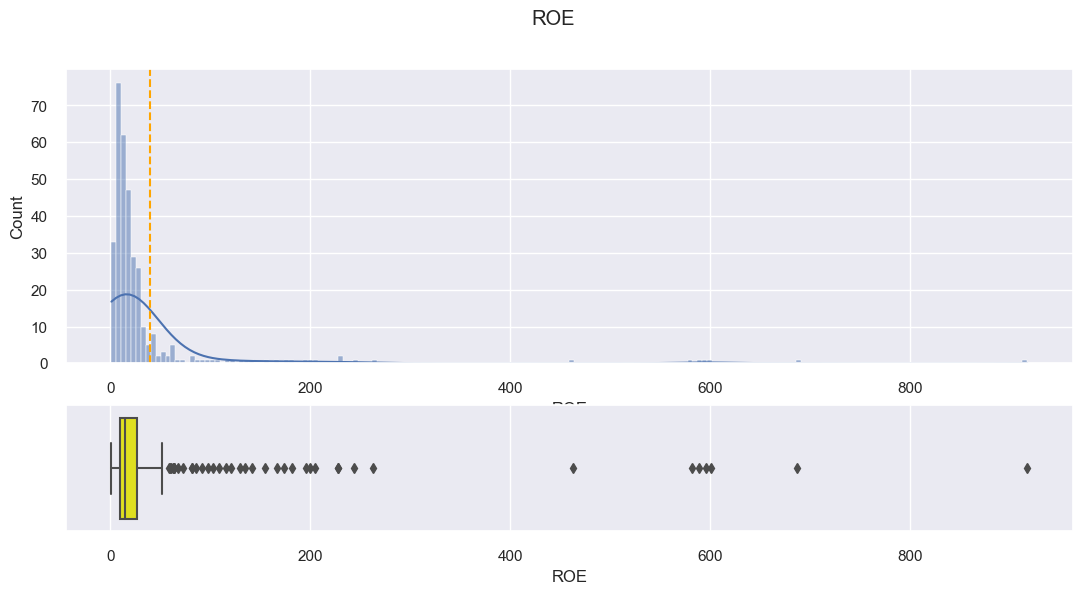

In [56]:
# Plot for ROE
hist_box(df, 'ROE')

In [57]:
df50 = df[df['ROE'] < 50]
df50.shape

(298, 14)

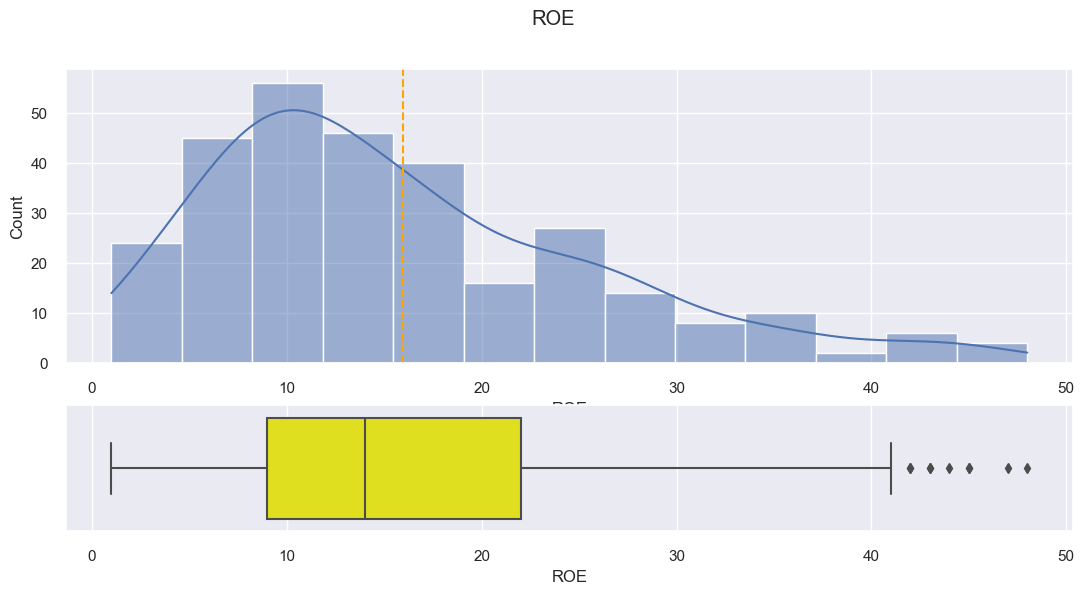

In [58]:
hist_box(df50, 'ROE')

**Observation**:

1. The distribution of ROE heavily right skewed.
2. There are lot of outliers present on higher end of distribution.
3. There are few companies with very high ROE of above 200, whereas 298 companies have ROE less than 50.
3. The df50 data is right skewed too with presence of outliers.

**`Cash Ratio`**

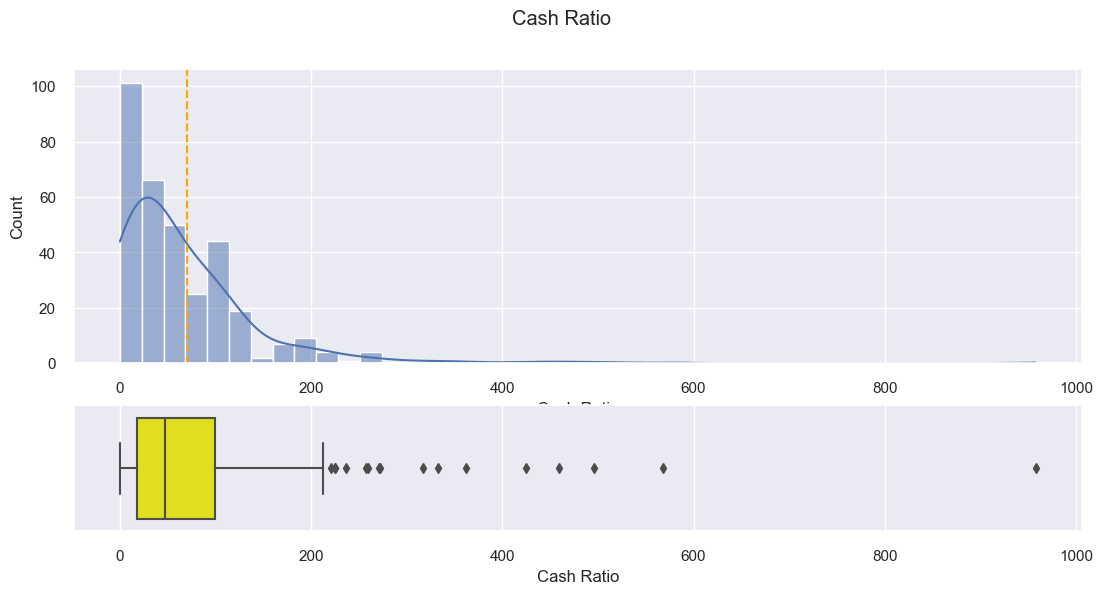

In [59]:
#plot for Cash Ratio
hist_box(df, 'Cash Ratio')

Observation:

1. The distribution of Cash Ratio is heavily right skewed.
2. As mean is 70 lies between median of 47 and 3rd quantile value of 99, the distribution has less outliers present on higher end of distribution as compared to ROE.
2. The highest Cash Ratio is 958, 20 times of the distribution median.


**`Net Cash Flow`**

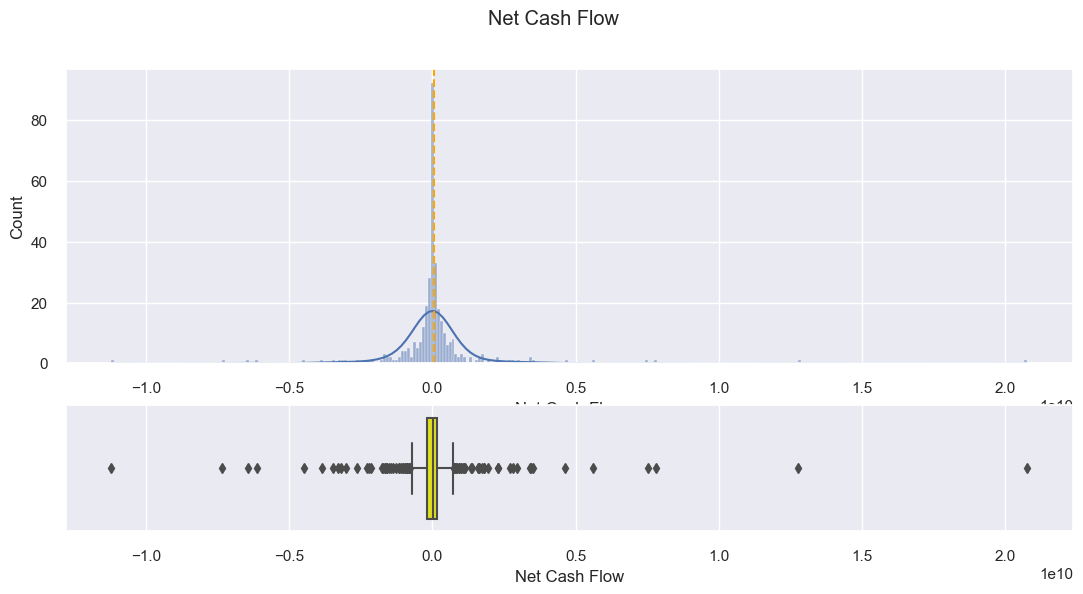

In [60]:
#plot for Net Cash Flow
hist_box(df, 'Net Cash Flow')

**Observation**:

1. The distribution of net cash flow is slightly right skewed.
2. There are lot of outliers present on both end of distribution.
3. More than 25% of companies have negative net cash flow which indicate companies are incurring net loss.

**`Net Income`**

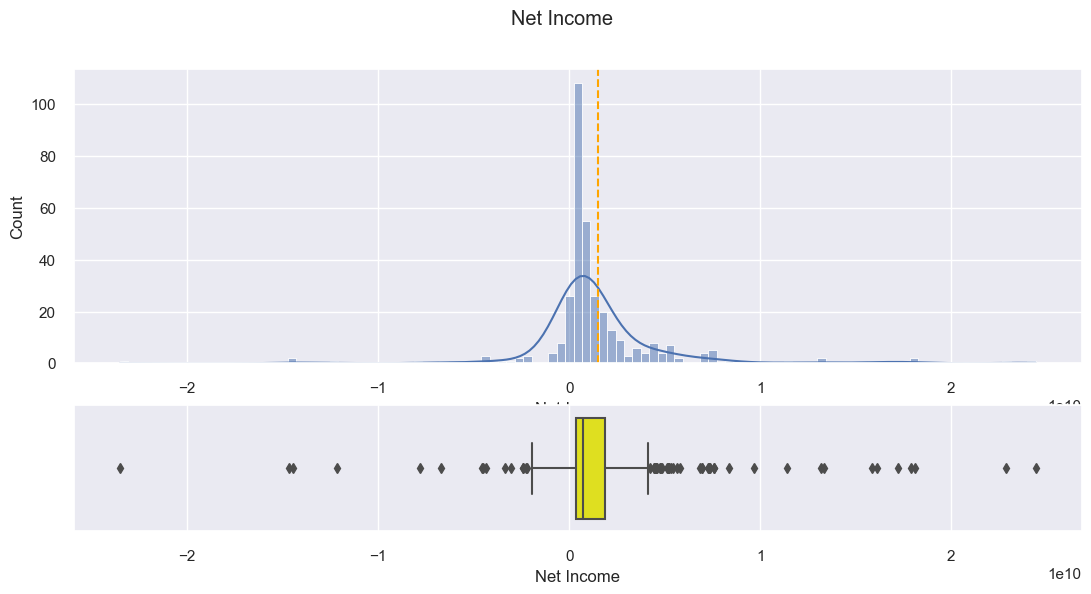

In [61]:
#plot for Net Income
hist_box(df, 'Net Income')

In [62]:
dfnet0 = df[df['Net Income'] < 0]
dfnet0.shape

(32, 14)

**Observation**:

1. The distribution of net income is slightly right skewed.
2. There are outliers present on both end of distribution, few far end outlier represents companies which have too negative 
and very highnet income 
3. There are 32 companies  which have negative net income. 

**`Earnings Per Share`**

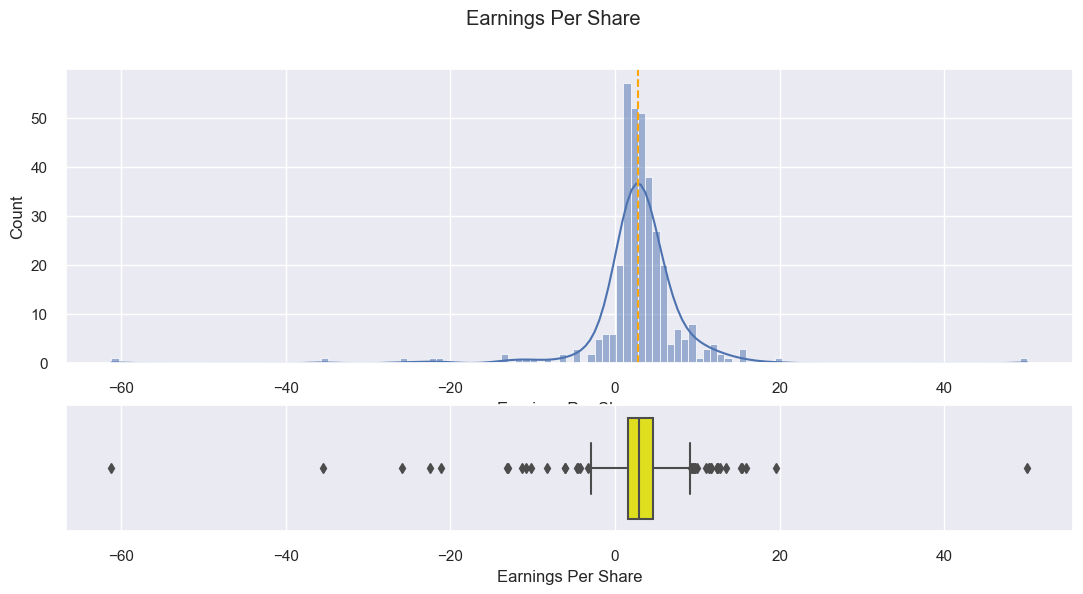

In [63]:
#plot for Net Income
hist_box(df, 'Earnings Per Share')

In [64]:
dfEPS0 = df[df['Earnings Per Share'] < 0]
dfEPS0.shape

(34, 14)

**Observations**:
    
1. Despite earning per share is derived from net income, this distribution is normally distributed.
2. As usual the outliers present on both end of distribution, far end negative EPS of company shows negative outlook for the companies.
3. There are 34 companies with EPS < 0 which is slightly higher number than negative net income.

**`Estimated Shares Outstanding`**

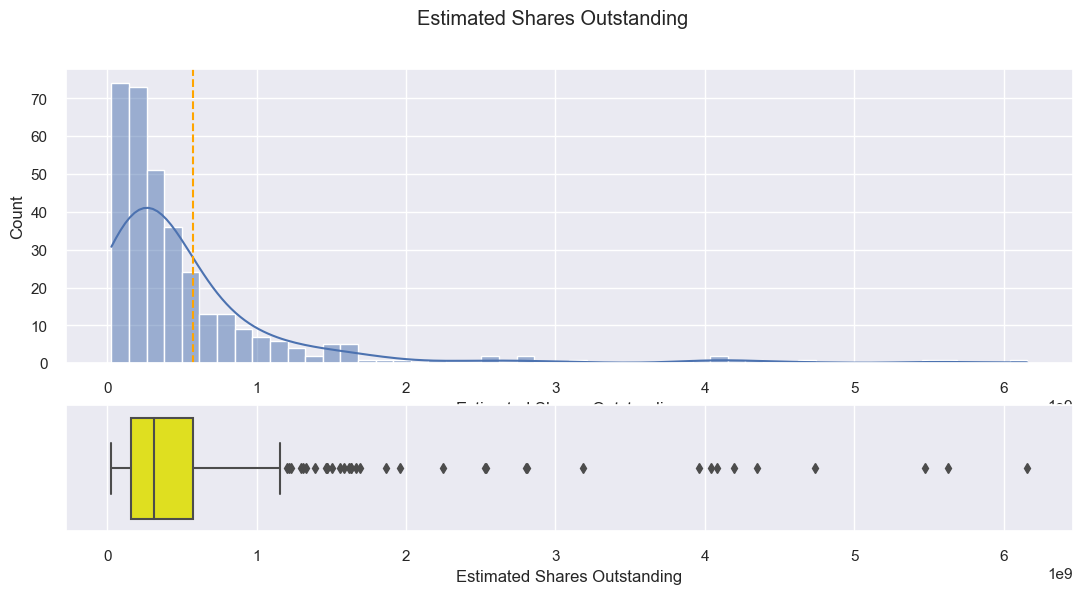

In [65]:
#plot for Estimated Shares Outstanding
hist_box(df, 'Estimated Shares Outstanding')

**Observation**:

1. The distribution of Estimated outstanding shares is heavily right skewed.
2. The distribution has many outliers present on higher end of distribution.
3. As expected there are no negative values for estimated outstading shares.
4. The distribution is si rightly skewed with outliers than mean of estimated outstanding shares is quite close 75% quantile value.

**`P/E Ratio and P/B Ratio`**

**`P/E Ratio`**

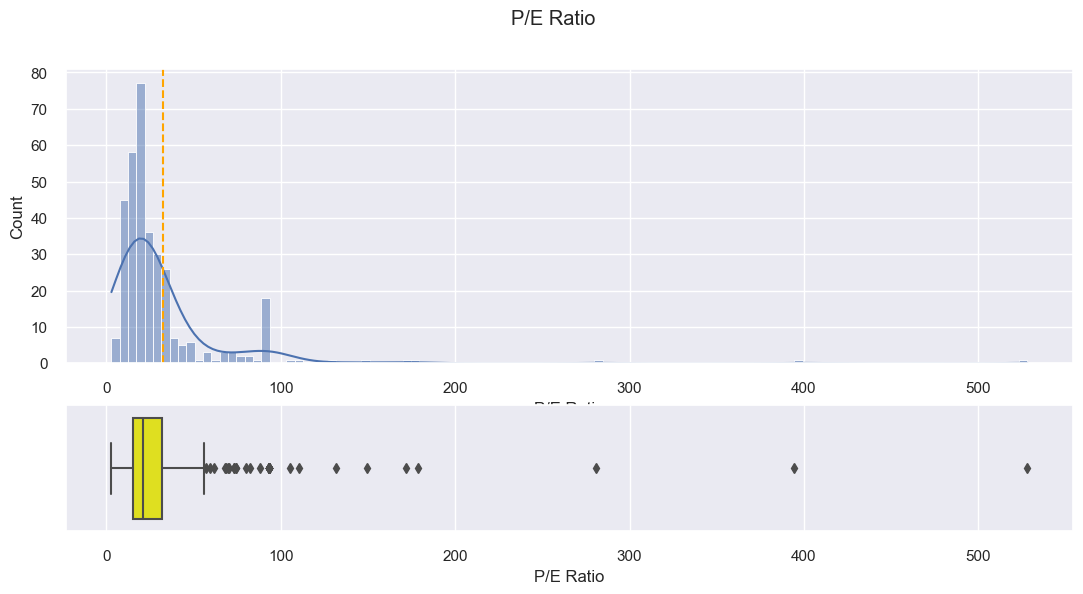

In [66]:
#plot for P/E Ratio
hist_box(df, 'P/E Ratio')

In [67]:
df90PE = df[(df['P/E Ratio'] > 80) & (df['P/E Ratio'] < 100)]
df90PE.shape

(20, 14)

In [68]:
dfhighPE = df[df['P/E Ratio'] > 200]
dfhighPE

Ticker Symbol             GICS Sector                   GICS Sub Industry  \
19           ALXN             Health Care                       Biotechnology   
26           AMZN  Consumer Discretionary  Internet & Direct Marketing Retail   
226          NFLX  Information Technology        Internet Software & Services   

     Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
19      190.750000     22.338380    2.022921    2         195       66000000   
26      675.890015     32.268105    1.460386    4          58     1333000000   
226     114.379997     11.145654    2.605949    6          65      695722000   

     Net Income  Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  \
19    144000000                0.68                   211764705.9  280.514706   
26    596000000                1.28                   465625000.0  528.039074   
226   122641000                0.29                   422900000.0  394.413783   

     P/B Ratio  
19  -14.171389  
26    3.904430  
226  -5.700168

**Observations**

1. The distribution of P/E ratio is heavily right skewed.
2. The distribution has many outliers present on higher end of distribution with clearly 3 companies (AlXN, AMZN, NFLX)
doing extremly well with very high P/E ratio.
3. Atleast there are 20 companies which have P/E ratio around 90.

**`P/B Ratio`**

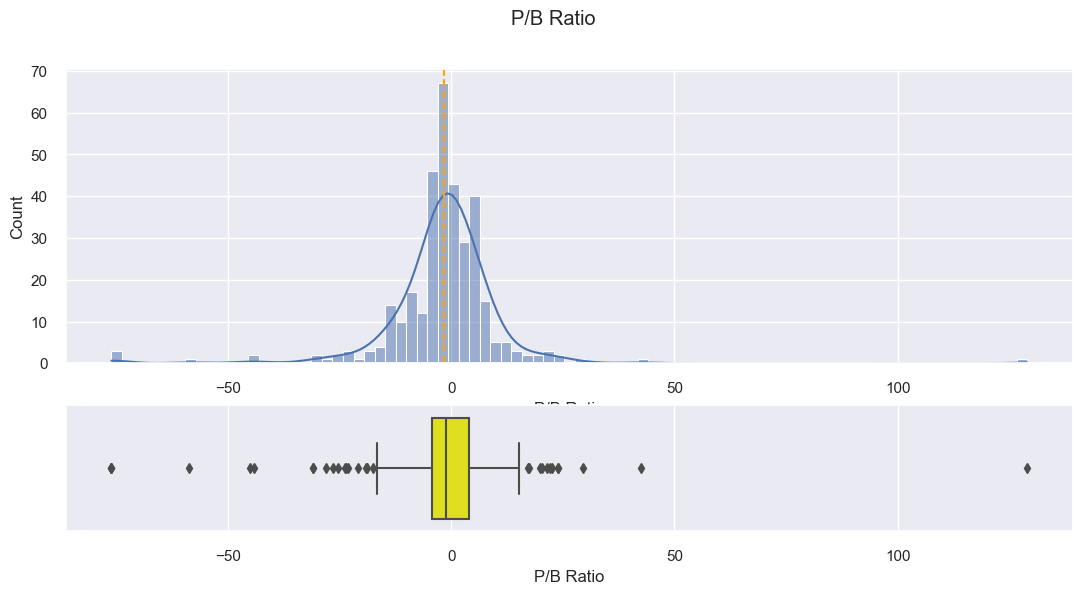

In [69]:
#plot for P/B Ratio
hist_box(df, 'P/B Ratio')

**Observations**:

1. The distribution of P/B ratio is normally distributed
2. The distribution has many outliers present on both the end of distribution and far end outlier represents companies which have too negative and very high P/B ratio.
3. The mean and median of distribution are quite close. 

### Plot the distribution for categoricals columns

**`GICS Sub Industry`**

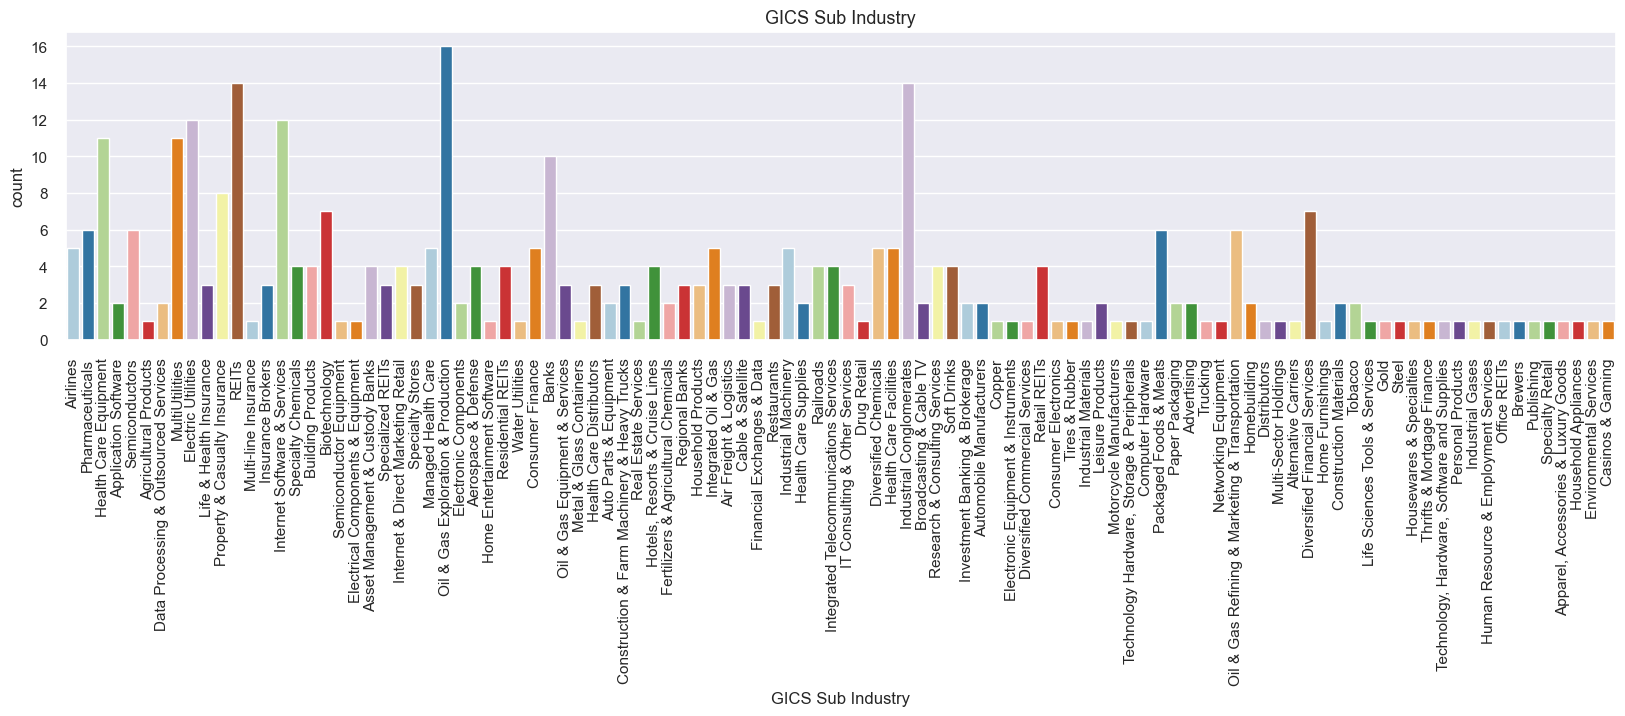

In [70]:
#Countplot for categorical value: 'GICS Sub Industry'
plt.figure(figsize = (20,4))  
plt.title( 'GICS Sub Industry', loc = 'center', fontsize = 13) # Plot title on top of plot

# plot the countplot for distribution 
sns.countplot(data = df, x = 'GICS Sub Industry', palette = 'Paired')
plt.xticks(rotation=90);

In [71]:
print(data['GICS Sub Industry'].value_counts().head(6))

Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Electric Utilities                    12
Internet Software & Services          12
Health Care Equipment                 11
Name: GICS Sub Industry, dtype: int64


**Observations**

1. The top 6 GICS Sub Industry actually capture 79 out of total 340 securities.
2. The Oil and Gas exploration consisitute appears in 16 GICS sub industry.

**`GICS Sector`**

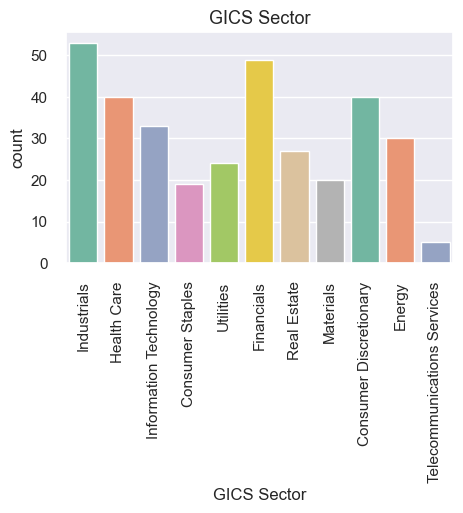

************************************************************************************************************************
Industrials               53
Financials                49
Health Care               40
Consumer Discretionary    40
Information Technology    33
Energy                    30
Name: GICS Sector, dtype: int64


In [73]:
bar_plot(df, 'GICS Sector')

**Observations**:

1. The top 4 GICS Sector  actually capture out of total 340 securities.
2. The Oil and Gas exploration consisitute appears in 16 GICS sub industry.

### Bivariate Analysis

In [75]:
def boxplot(data, column, target):
    plt.figure(figsize=(15, 7))
    plt.title( "column" , loc = 'center', fontsize = 13)
    sns.boxplot(data = df, x=column, y=target, palette = 'bright')
    plt.xticks(rotation=60)
    plt.show()
    plt.figure(figsize=(15, 7))
    sns.barplot(data = df, x=column, y=target, errorbar=('ci', False), palette = 'Set2')
    plt.xticks(rotation=60)
    plt.show()

**How are the different variables correlated with each other?**

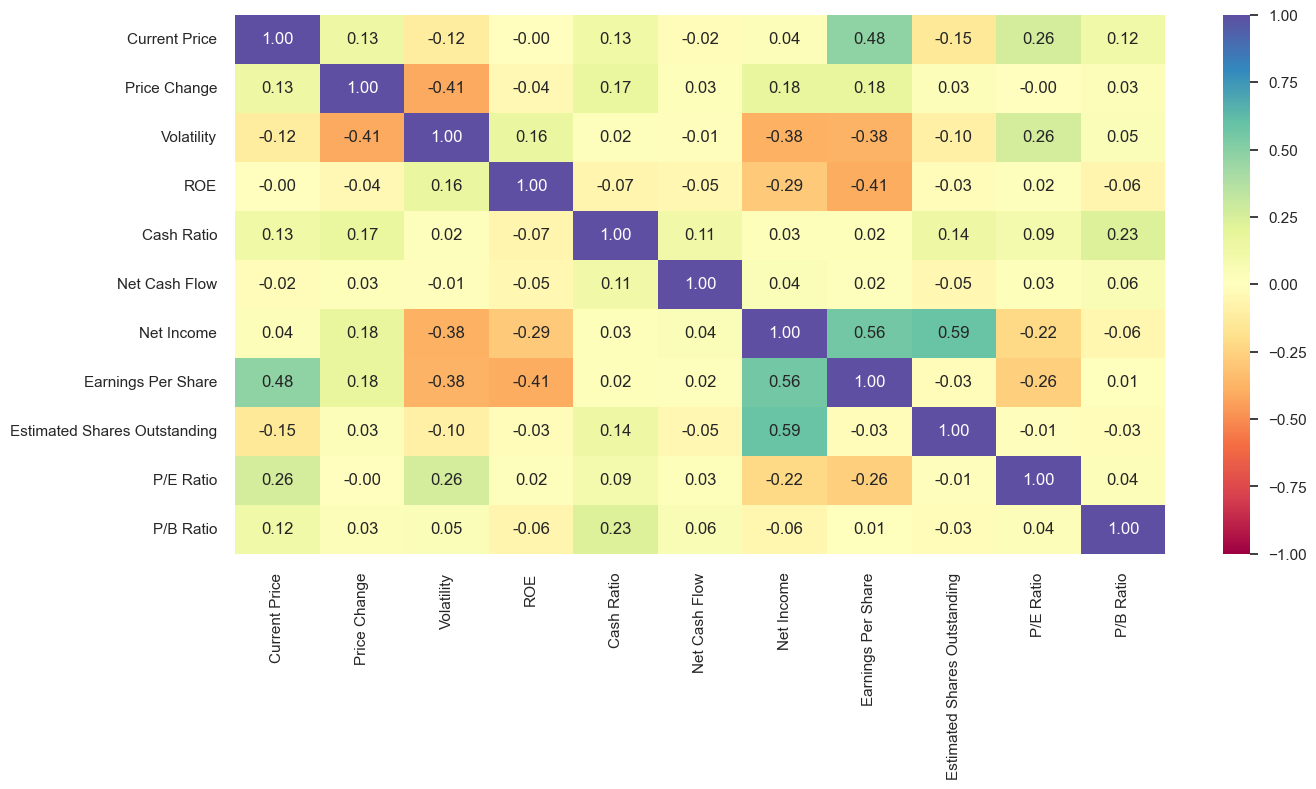

In [76]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**:
    
1. There is strong correlation (.59) between net income with estimated shares outstanding, higher share will have positive 
impact on net income.
2.  There is positive correlation (.56) between net income with earnings per share, which signifies increase in EPS will lead to higher net income of the company.
3. The net income and earnings per share is negatively correlated (-.38) with volatility which means company with higher net income and EPS
usually have low volatility.
4. The earning per share is positively correlated with current price, which signifies increase in EPS will lead to higher Current price of the company. 
5. The volatility is negatively correlated with price change (-.41) which means price change is inversly proportional to volatility.
6. EPS and ROE are inversly proportional to each other as well, therefore increase in EPS will lead to decrease in ROE.

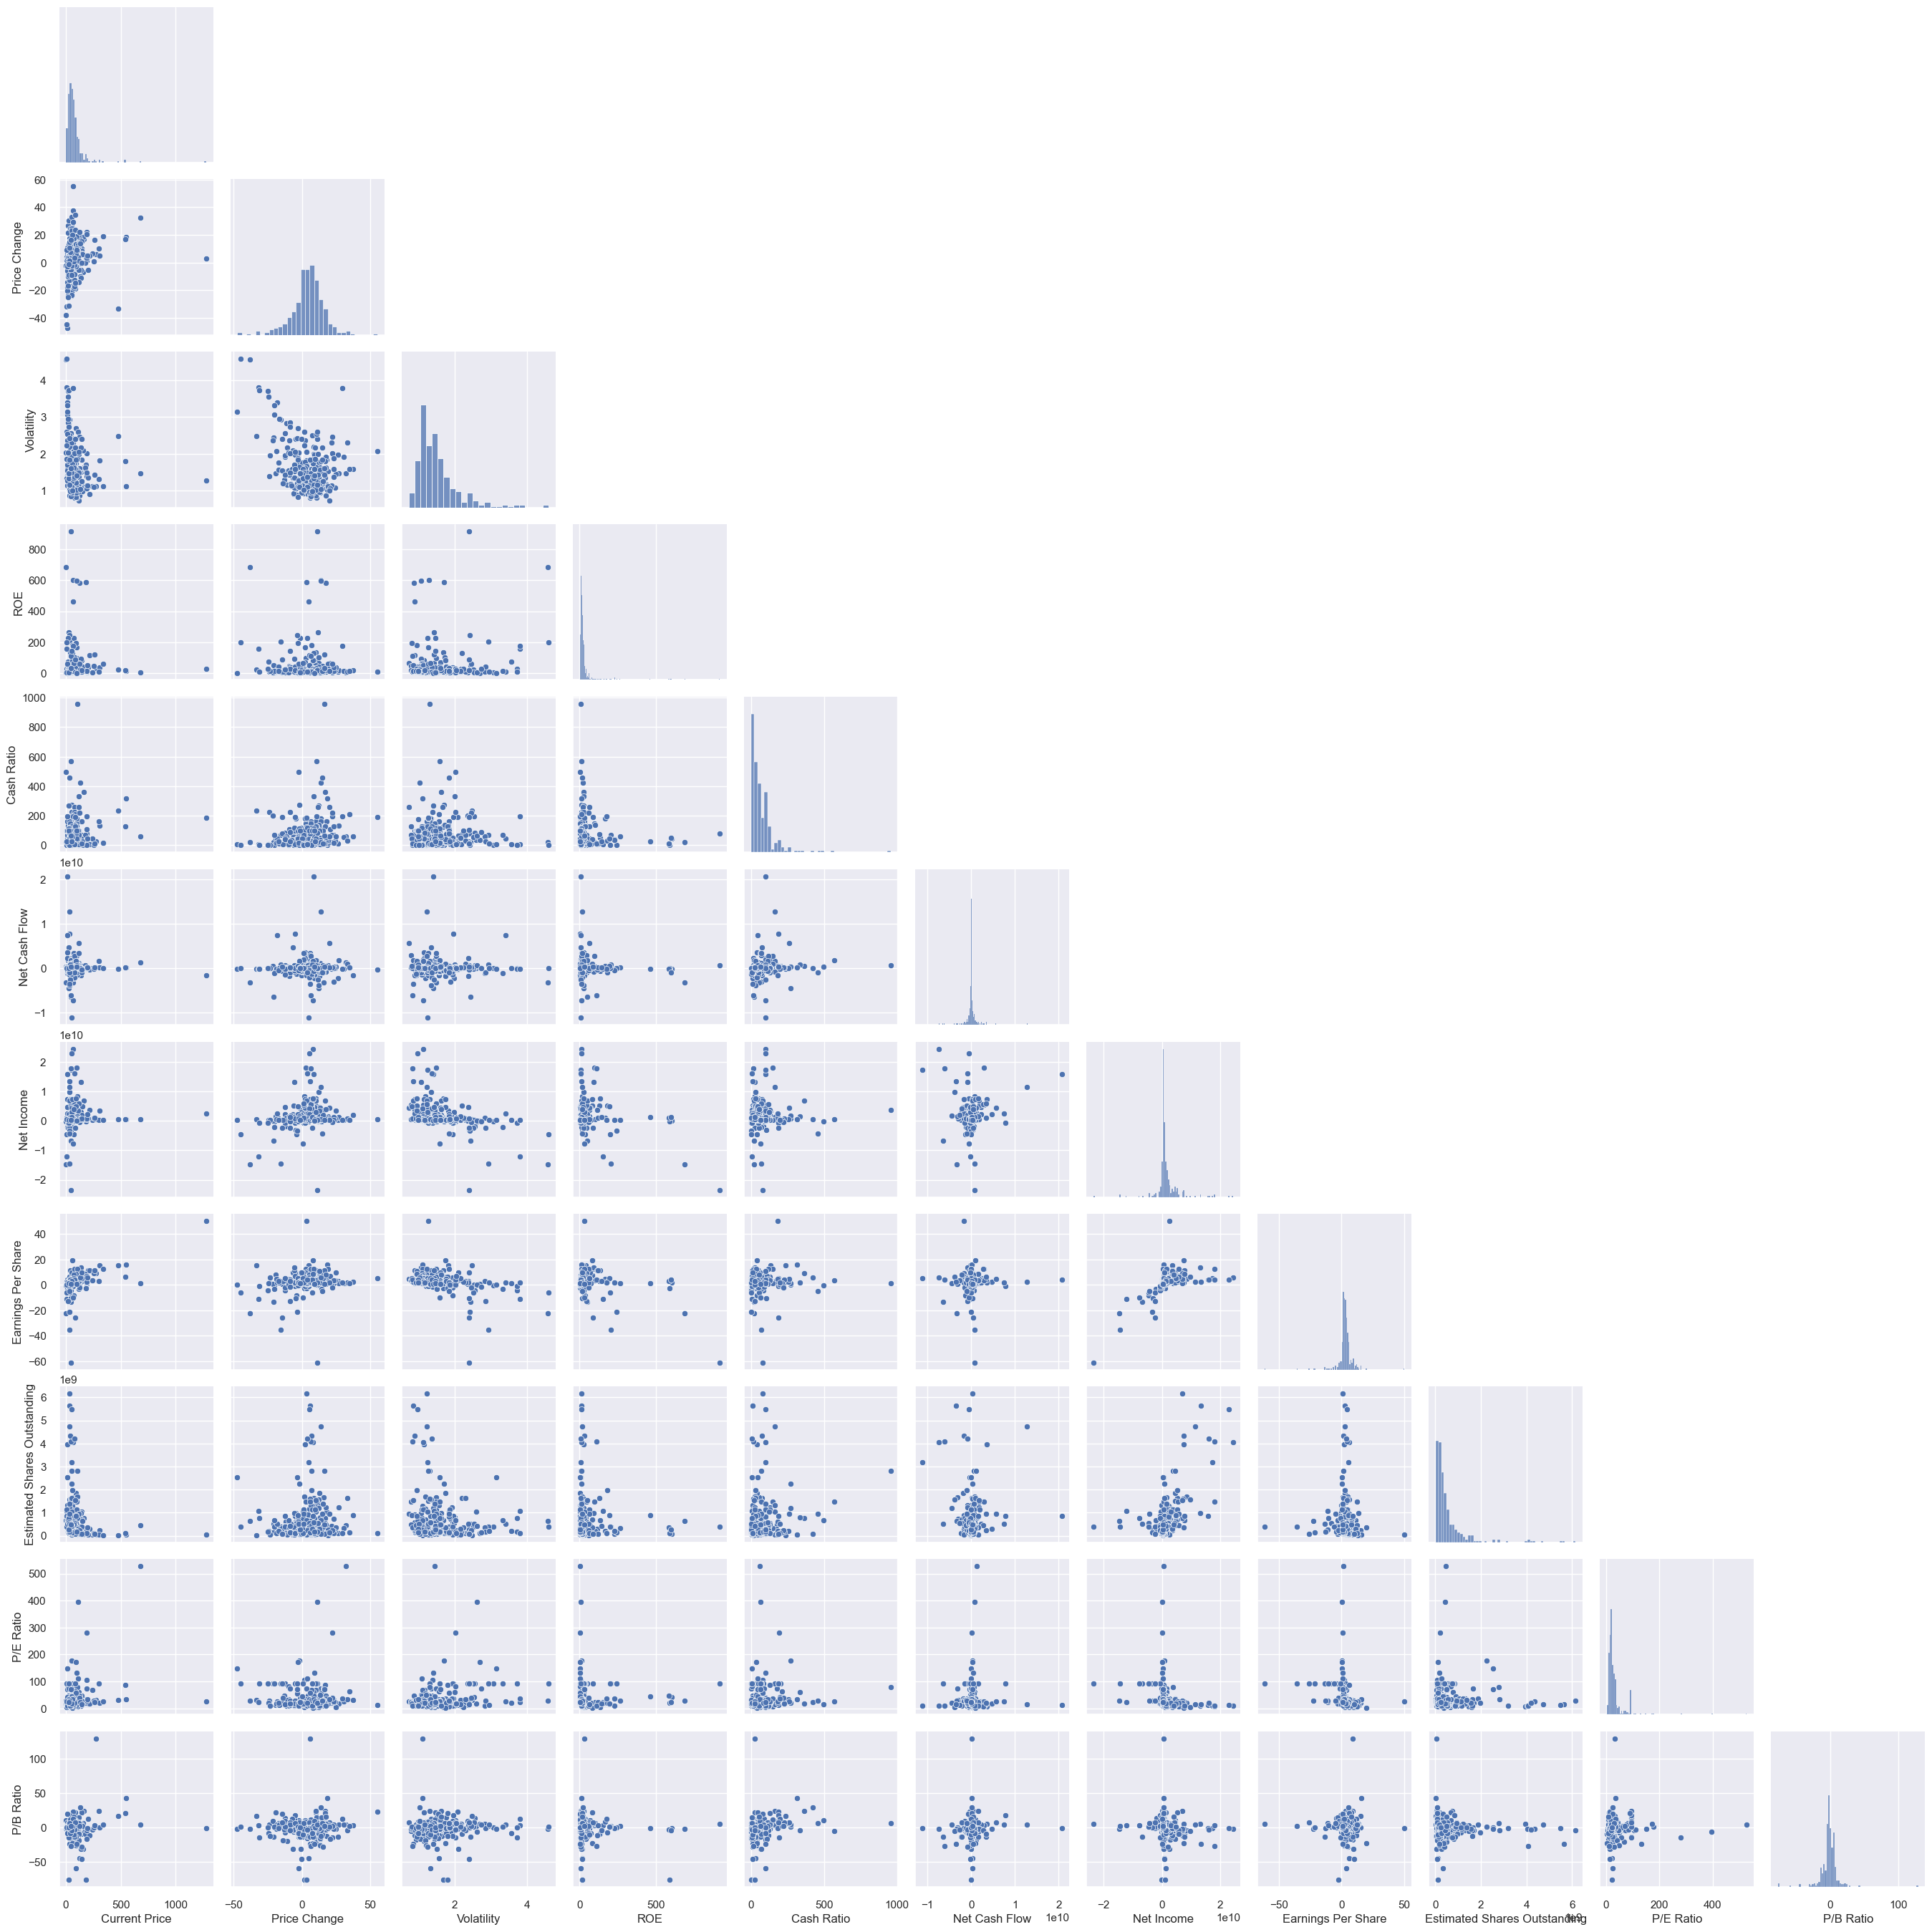

In [77]:
#lets plot numerical columns
sns.pairplot(data=df, corner = 'True')

**Observations**:
    
1. The P/E and P/B ratio have some correlation with net cash flow, net income, earnings per share,
and estimated shares outstanding.
2. The estimated shares outstading have prominent linear relationship with  current price, ROE and earnings per share.
3. the net income also shows some correlation with current price and ROE.

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

**GICS Sector vs Price Change**

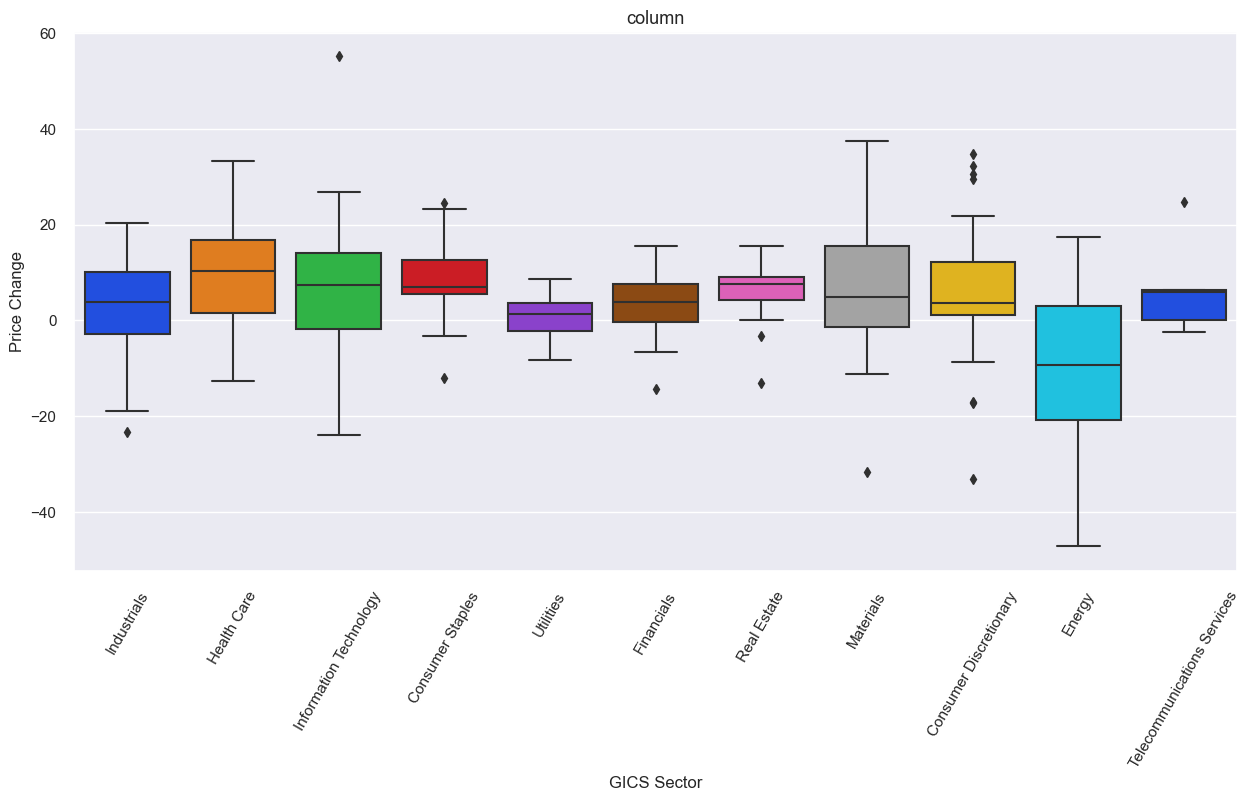

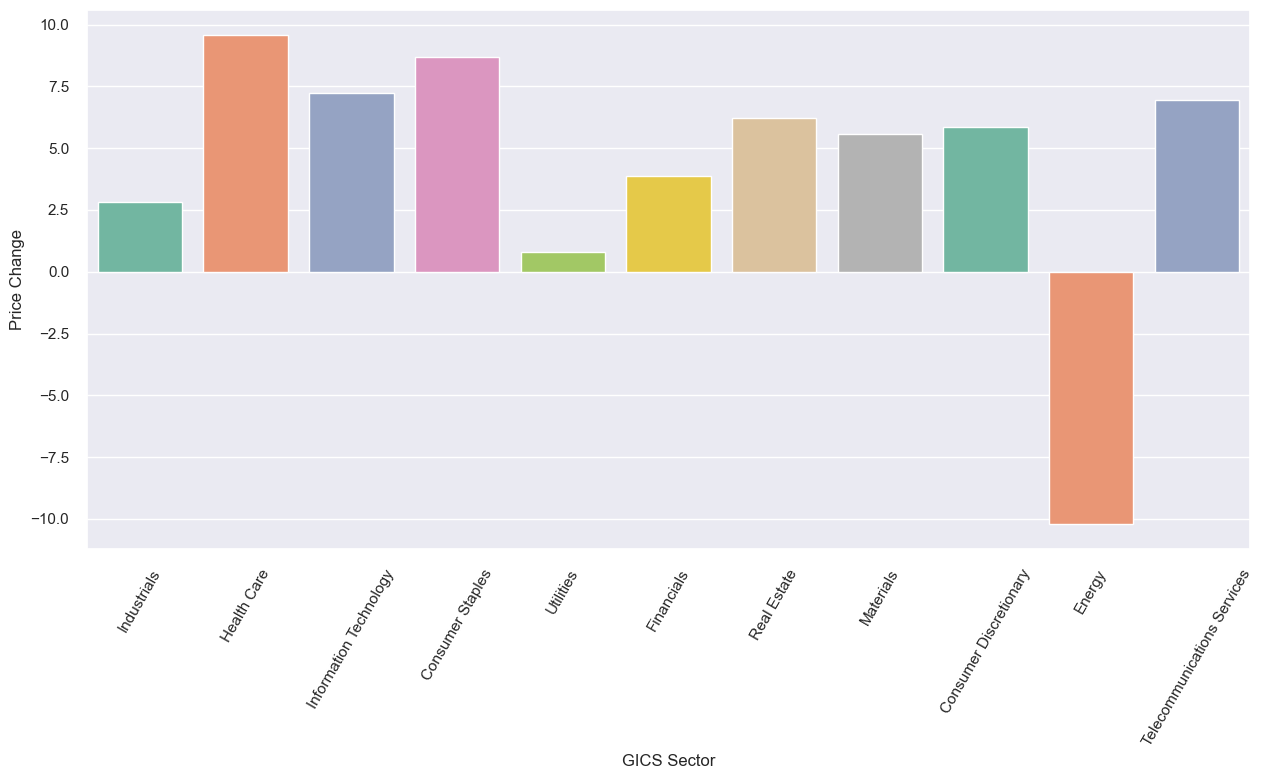

In [79]:
boxplot(df, 'GICS Sector', 'Price Change')

**Observations**:
    
1. The health care sector has seen maximum price change upto approximately ~ 9.5%.
2. The energy sector has seen nehative price change upto 10%.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

**GICS Sector & Cash Ratio**

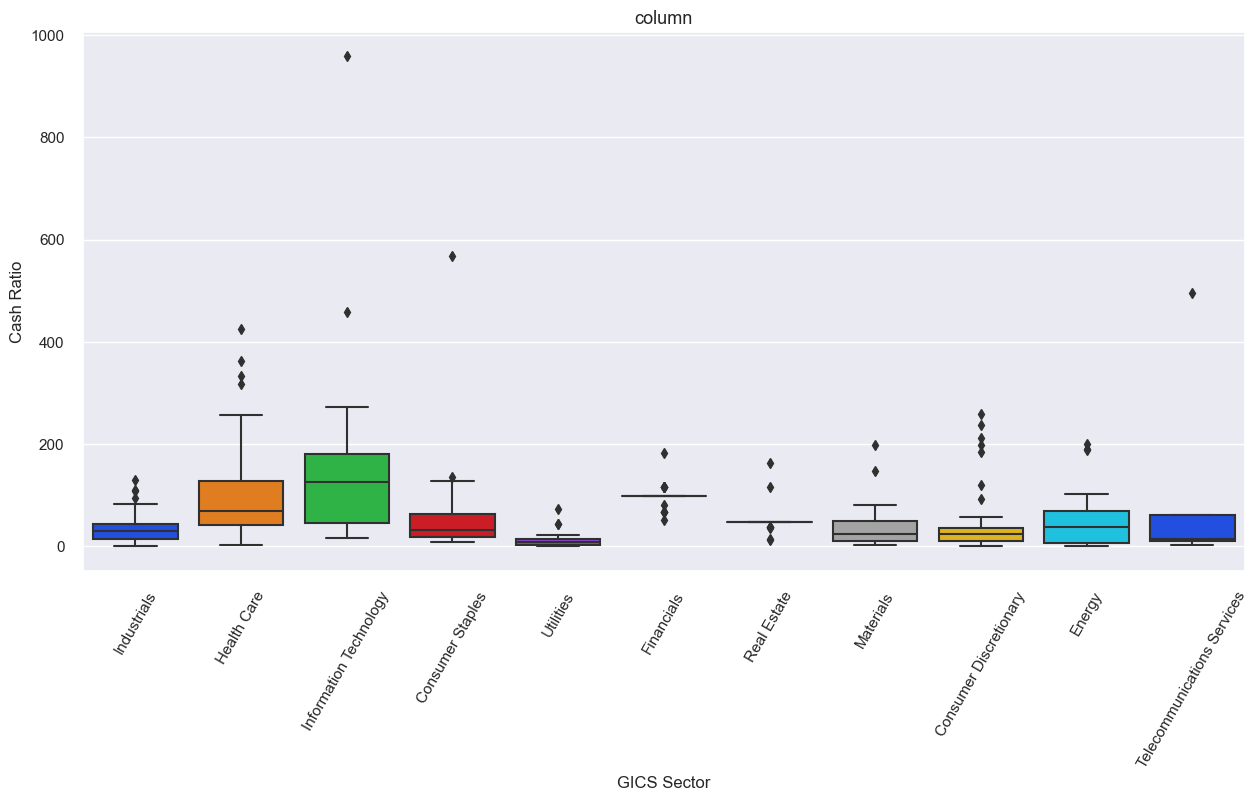

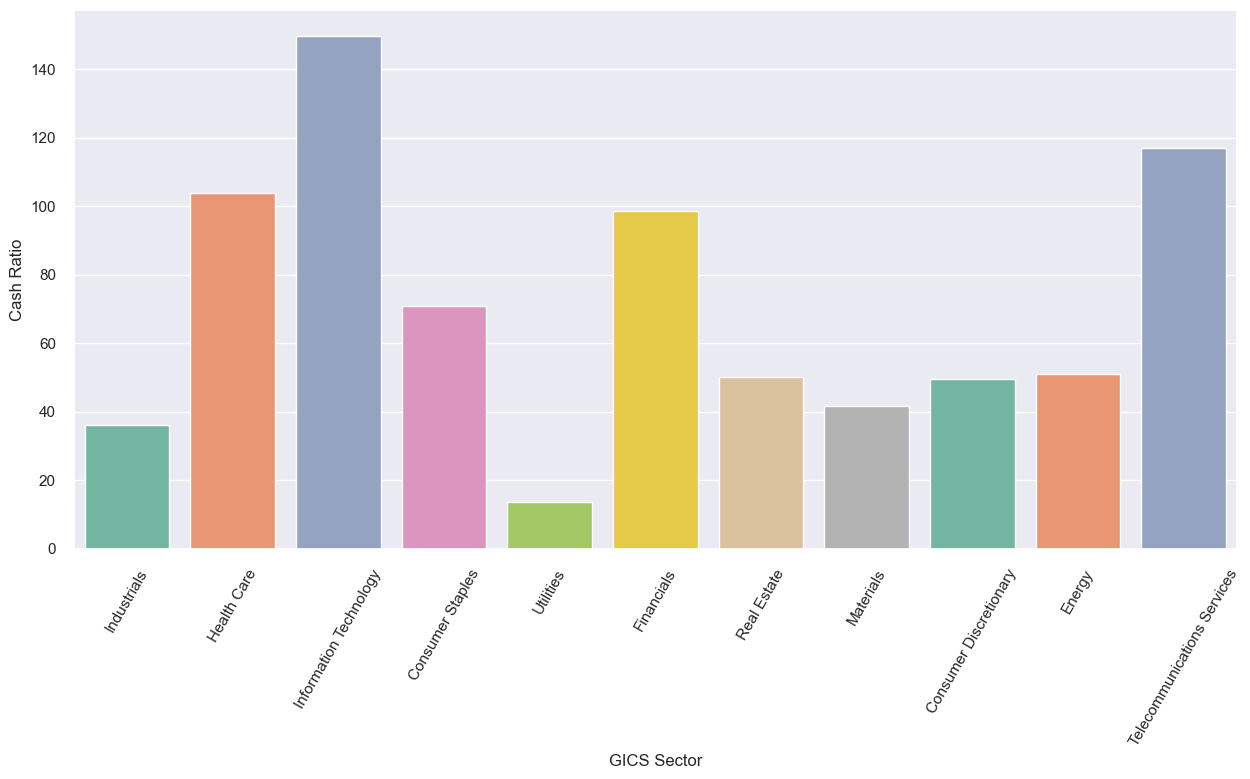

In [80]:
boxplot(df, 'GICS Sector', 'Cash Ratio')

**Observations**

1. The information technology-IT and Telecommunications Service-TS are two sector with higher cash ratio (>115) hence have better ability to pay for short term obligations.
2. The utilities sector has quite low cash ratio < 20 means this sector lacks cash reserves.
3. The relative newer sector like IT and TS are sitting on higher cash ratio, 


**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

**GICS Sector & P/E ratios**

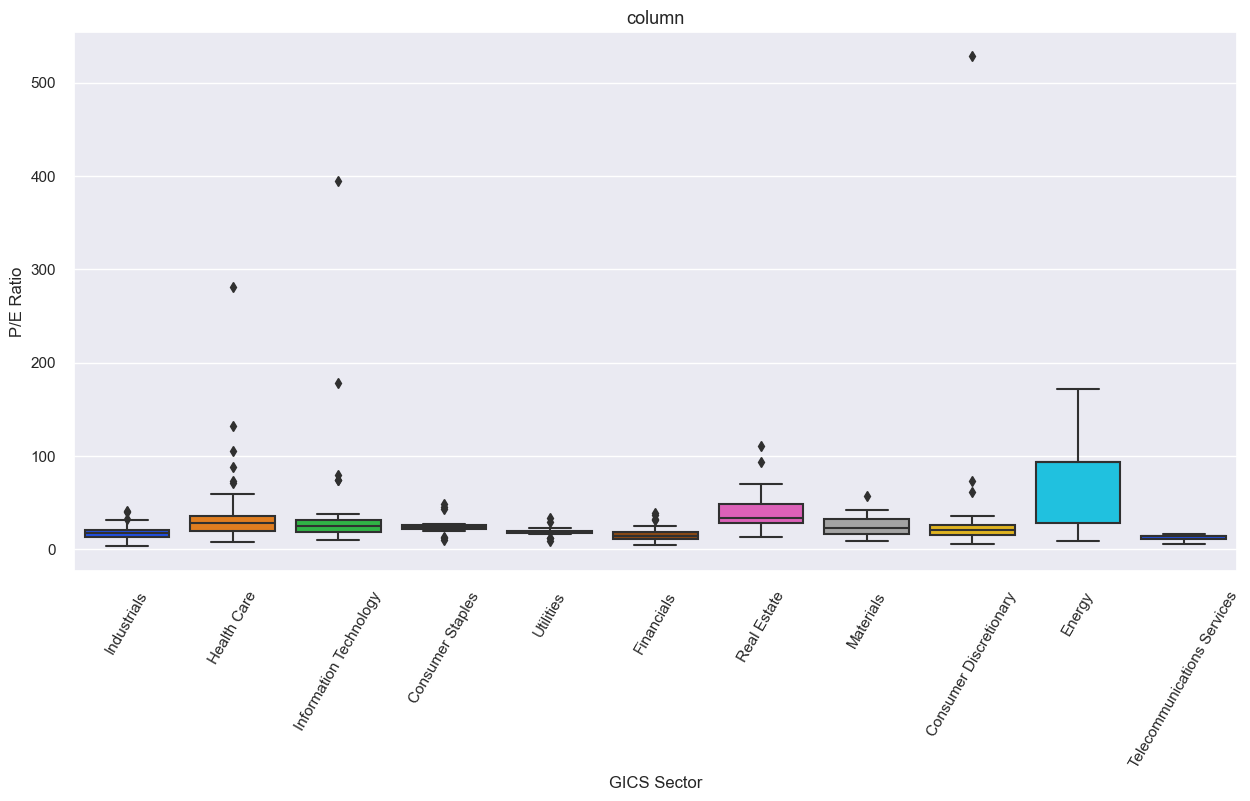

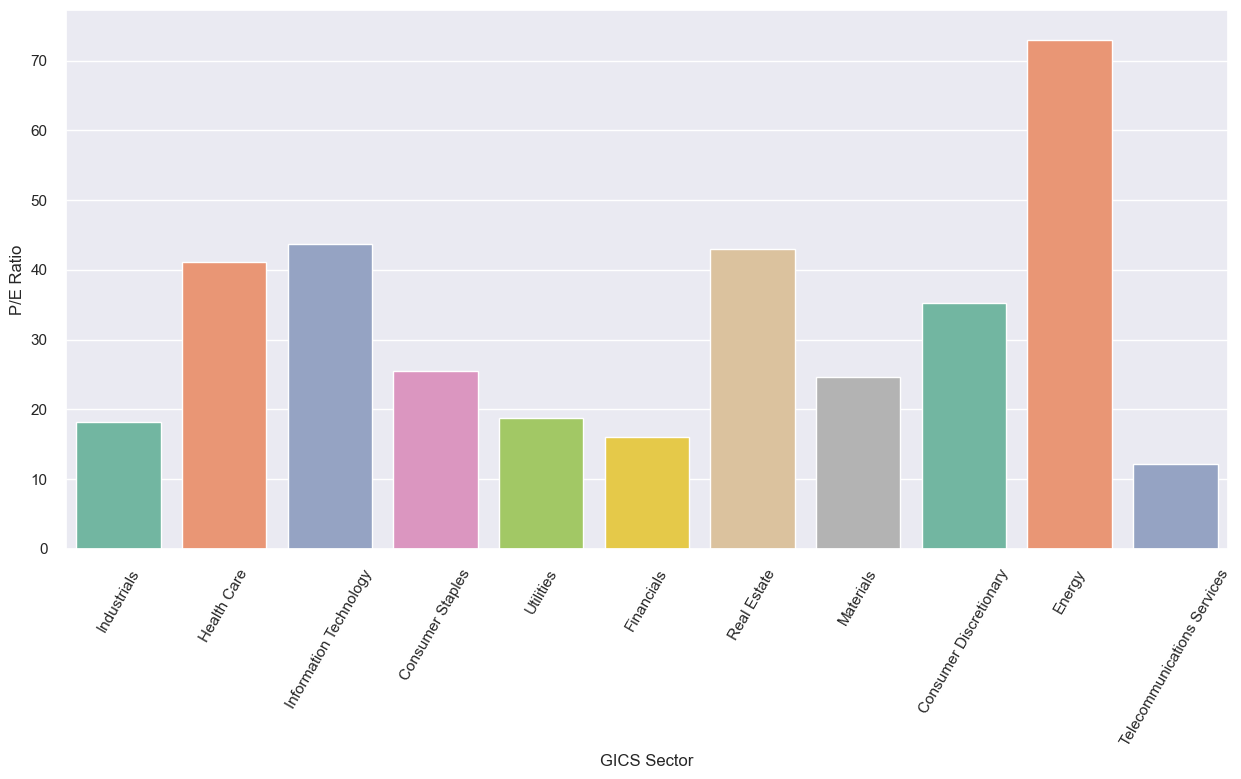

In [81]:
boxplot(df, 'GICS Sector',  "P/E Ratio" )

**Observations**:
    
1. The energy sector has the highest P/E ratios approximately ~ 72, quite higher than all other sectors. 
2. The telecommunication service have the lowest average P/E ratio ~ 12 as compared to other sector.

Inference:

Higher P/E ratio signifies that investors are willing to pay 72 times higher price for security for similar EPS. 

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

**GICS Sector & Volatility**

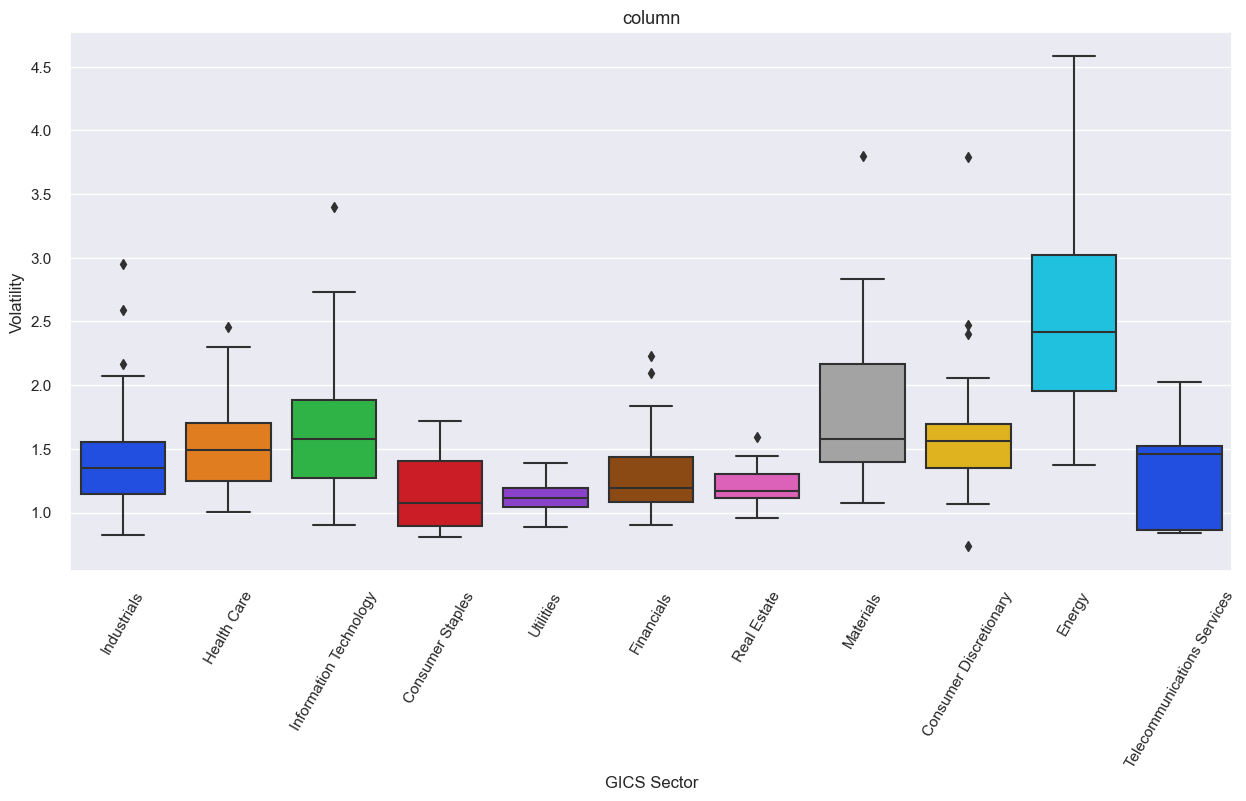

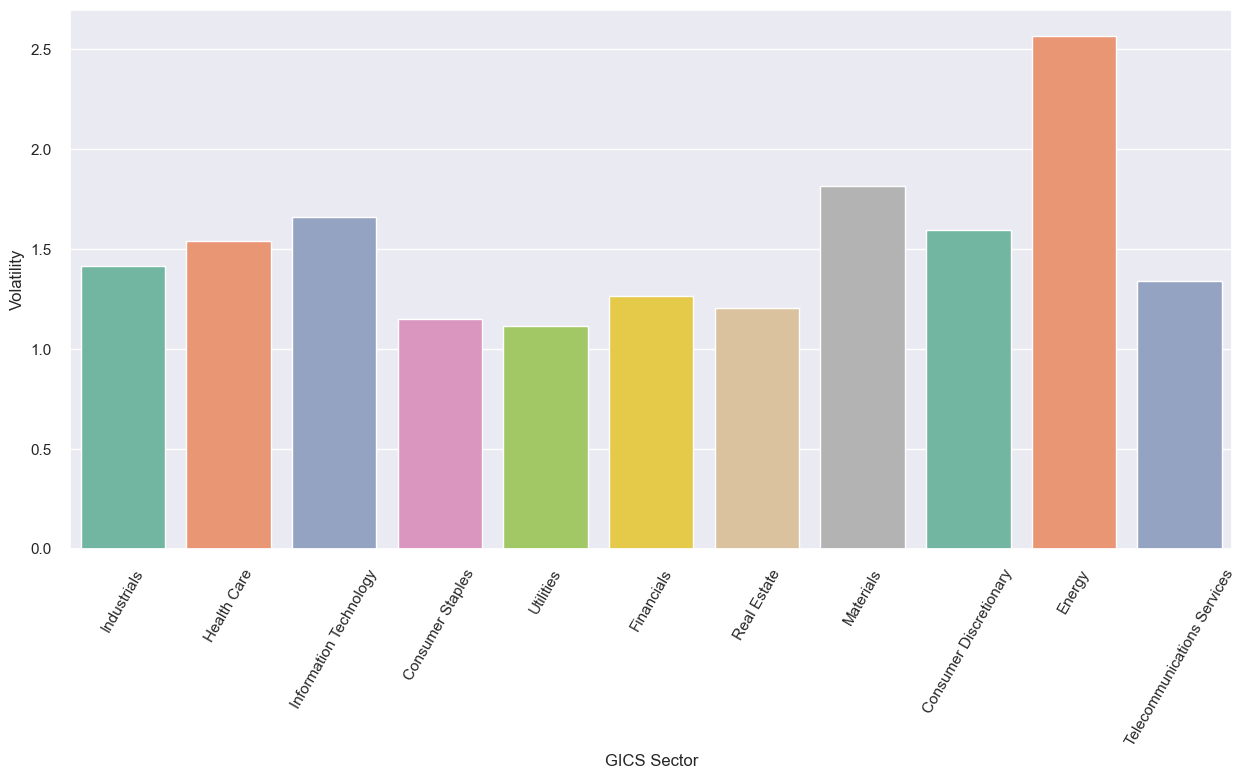

In [82]:
boxplot(df, 'GICS Sector',  "Volatility" )

**Observations**:

1. The energy sector has the highest volatility of 2.5 making it quite risky as compared to other sector.
2. The consumer staples, utilities, financials, real estates have lower volatility around ~ 1.2.

Inference:
Usually consumer market sectors have low volatility like consumer staples, utilities and real estates.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

**Dataset has no missing data or duplicated values** 

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

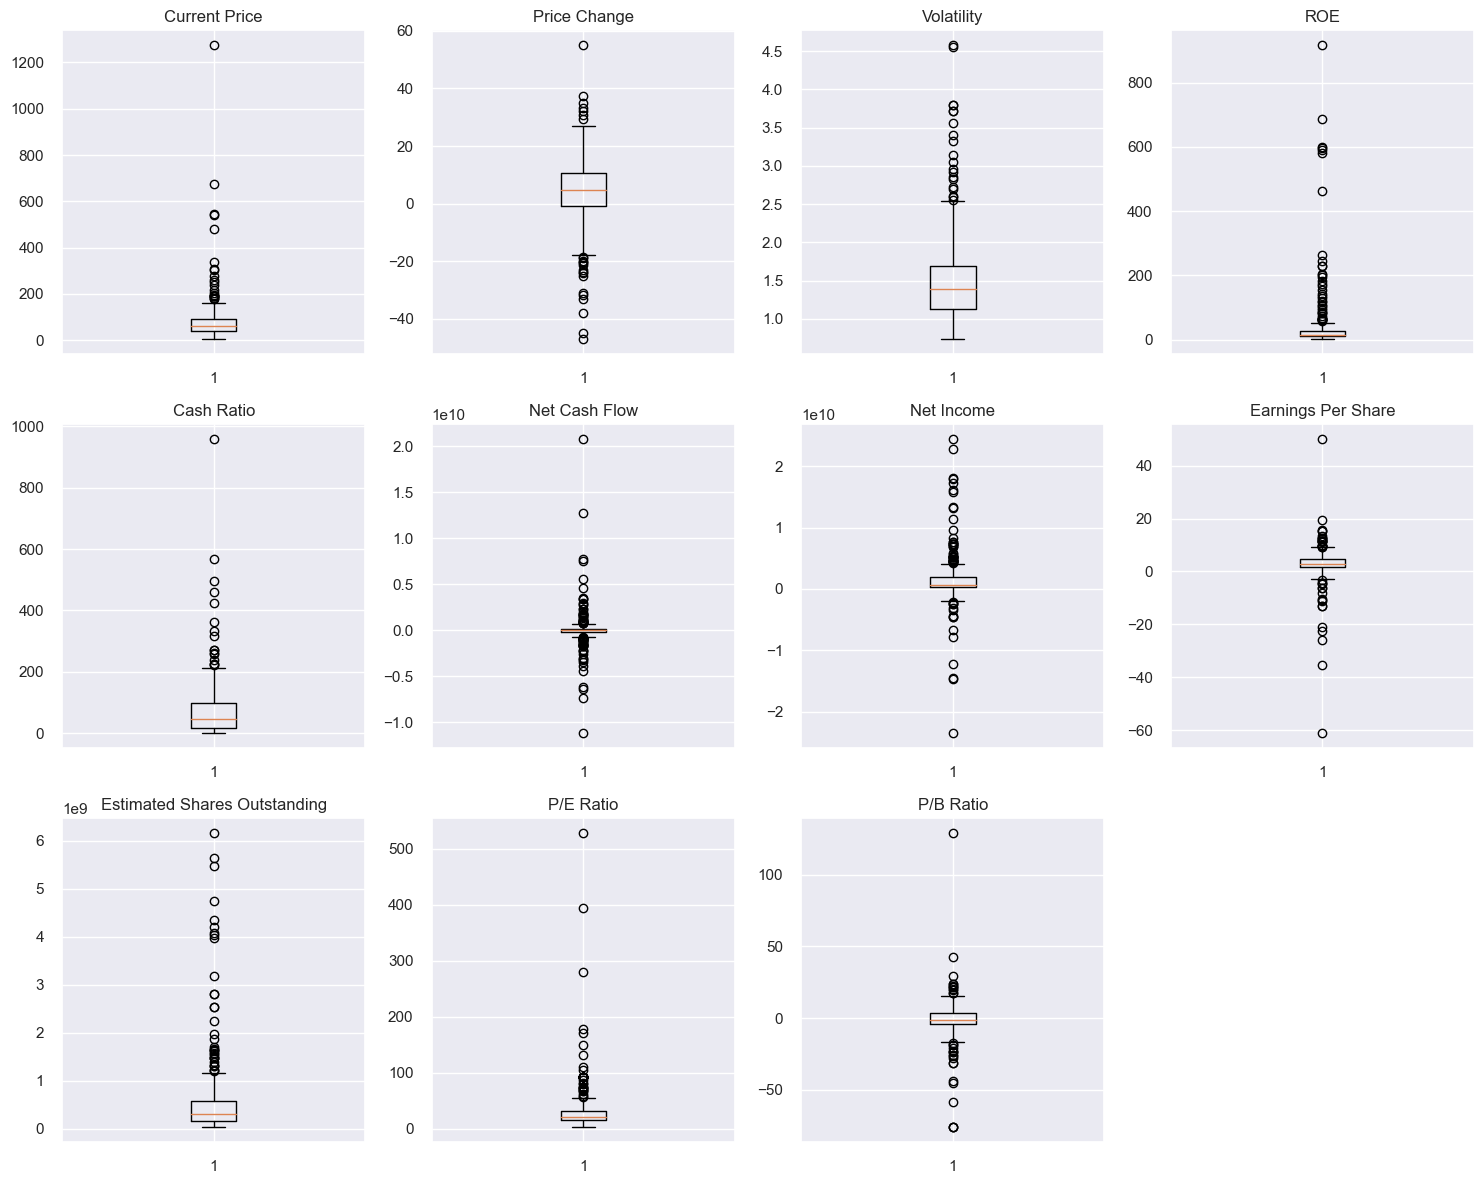

In [84]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observation:

1. There are outliers in the data.
2. As they are real values and we will scaled the data, we are not treat them.

### Scaling

- Let's scale the data before we proceed with clustering.

In [86]:
#Create list of all numerical columns for scaling
num_col = df.select_dtypes(exclude="object").columns.tolist()
num_col

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [101]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)
subset_scaled

array([[-0.39334123,  0.49394985,  0.2727489 , ...,  0.10786299,
        -0.65248711, -0.50665346],
       [-0.2208372 ,  0.35543891,  1.13704483, ...,  1.25027416,
        -0.31176905, -0.50420469],
       [-0.36719495,  0.6024795 , -0.42700717, ...,  1.09802058,
        -0.39150173,  0.09494078],
       ...,
       [ 0.22191276,  0.43953914, -0.20606693, ..., -0.46005754,
         2.23363447, -1.58938994],
       [-0.54705258, -0.43681096, -0.09781298, ..., -0.37785227,
        -0.22271438,  0.11867997],
       [-0.3364527 ,  1.05104602,  0.14267127, ..., -0.09294161,
         0.85490199,  0.24675384]])

In [102]:
type(subset_scaled)

numpy.ndarray

In [203]:
# creating a dataframe of the numpy array of scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

## EDA

- It is a good idea to explore the data once again after manipulating it.

<Axes: >

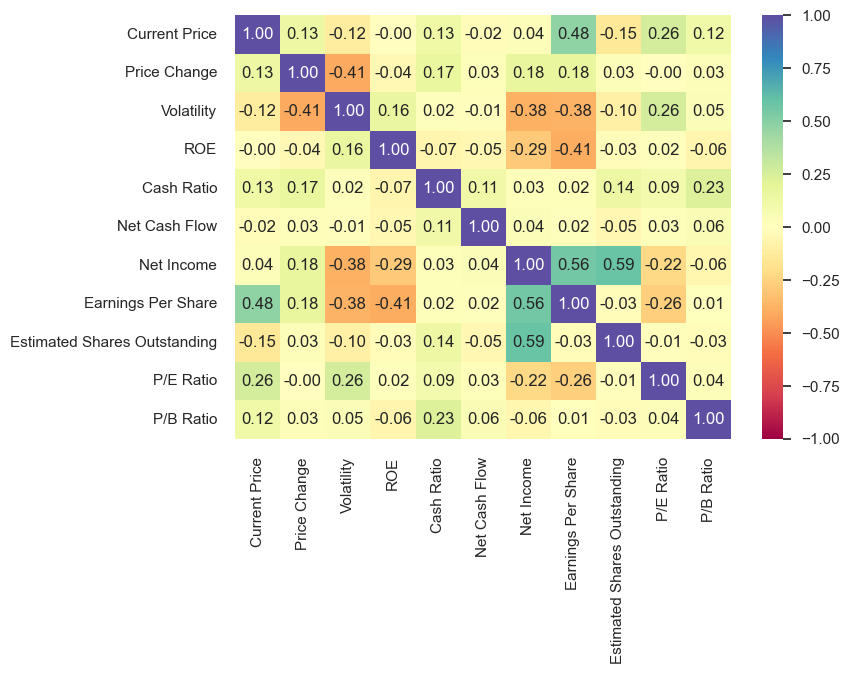

In [108]:
sns.heatmap(subset_scaled_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

## K-means Clustering

### Checking Elbow Plot

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.273154903795774
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.142986303882605
Number of Clusters: 6 	Average Distortion: 2.056310851689408
Number of Clusters: 7 	Average Distortion: 1.9790306256336803
Number of Clusters: 8 	Average Distortion: 1.962985208935381
Number of Clusters: 9 	Average Distortion: 1.9322508609646234
Number of Clusters: 10 	Average Distortion: 1.864272315337918
Number of Clusters: 11 	Average Distortion: 1.7936374941086612
Number of Clusters: 12 	Average Distortion: 1.7490589066183273
Number of Clusters: 13 	Average Distortion: 1.7120946526296594
Number of Clusters: 14 	Average Distortion: 1.69011308171502


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

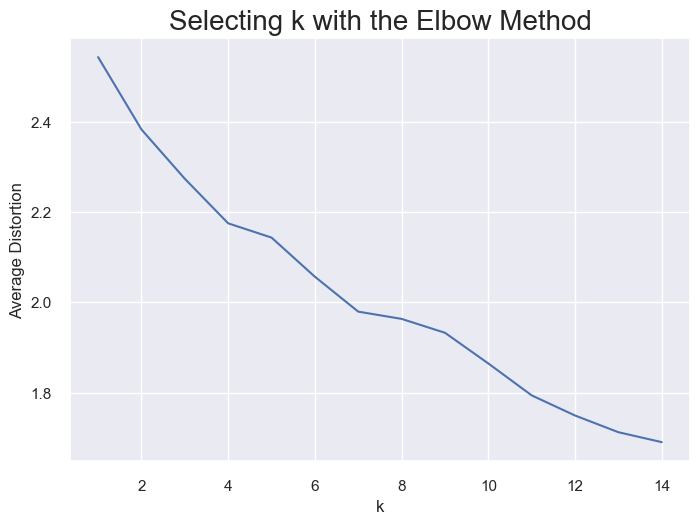

In [149]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**The appropriate value of k from the elbow curve seems to be 5,7,and 9**

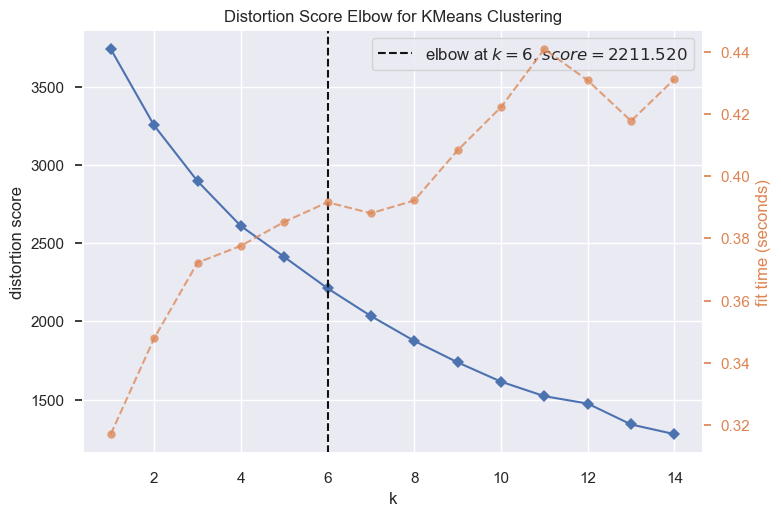

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [152]:
#fit KMeans model and use visualizaer to indicate optimal K value
k_means_df = subset_scaled_df.copy()
Kmodel = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show() 

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


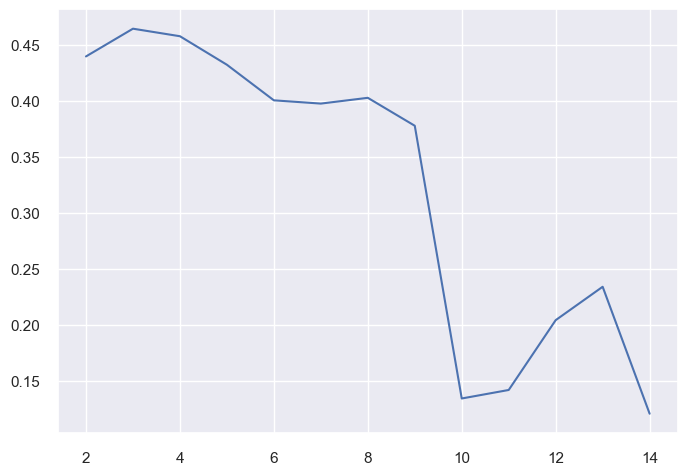

In [153]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

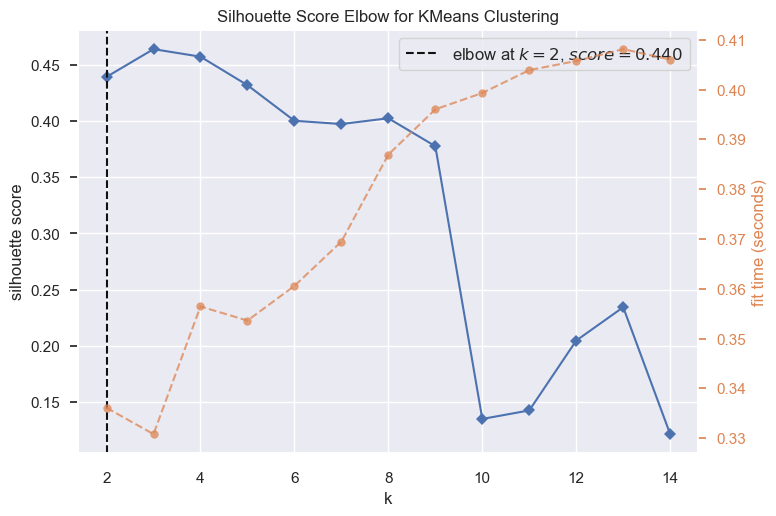

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [154]:
#fit KMeans model and use visualizaer to indicate optimal K value
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**From the silhouette scores, 3, 4 and 5 seems to be good value for k.**

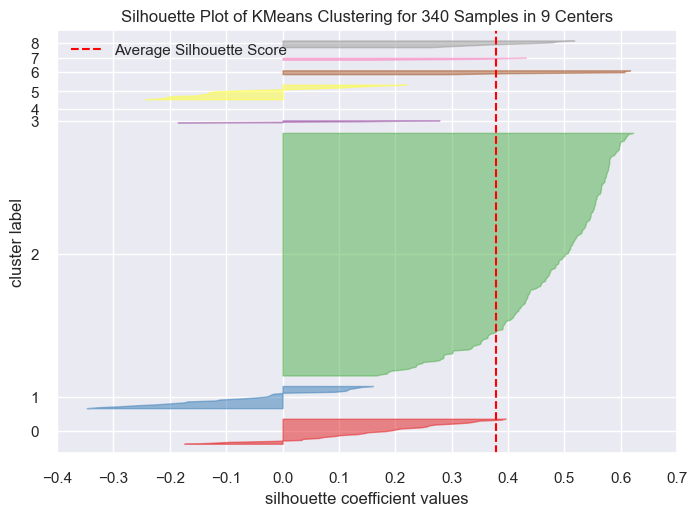

In [164]:
# finding optimal no. of clusters with silhouette coefficients
visualizer9 = SilhouetteVisualizer(KMeans(9, random_state=1))
visualizer9.fit(subset_scaled_df)
visualizer9.show();


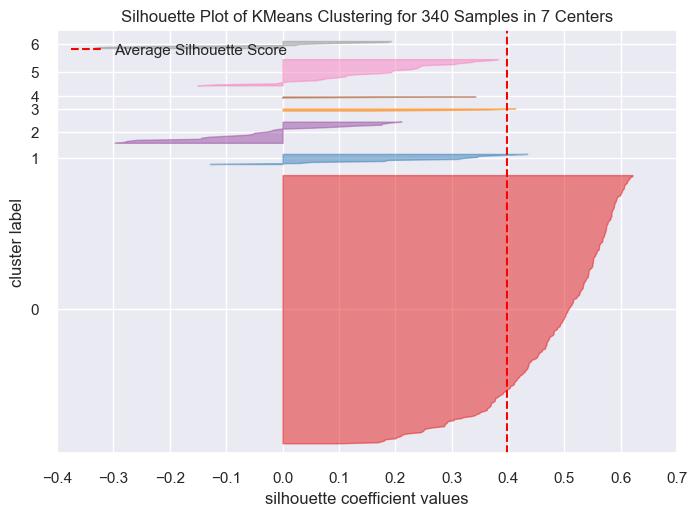

In [165]:
# finding optimal no. of clusters with silhouette coefficients
visualizer7 = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer7.fit(subset_scaled_df)
visualizer7.show();

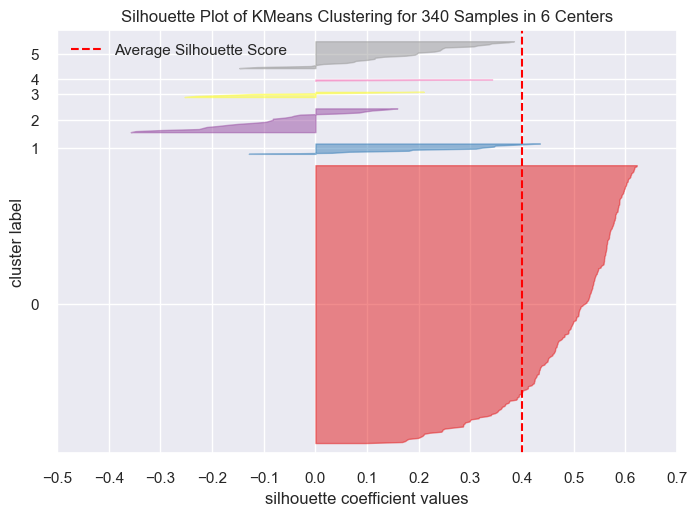

In [166]:
# finding optimal no. of clusters with silhouette coefficients
visualizer6 = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer6.fit(subset_scaled_df)
visualizer6.show();

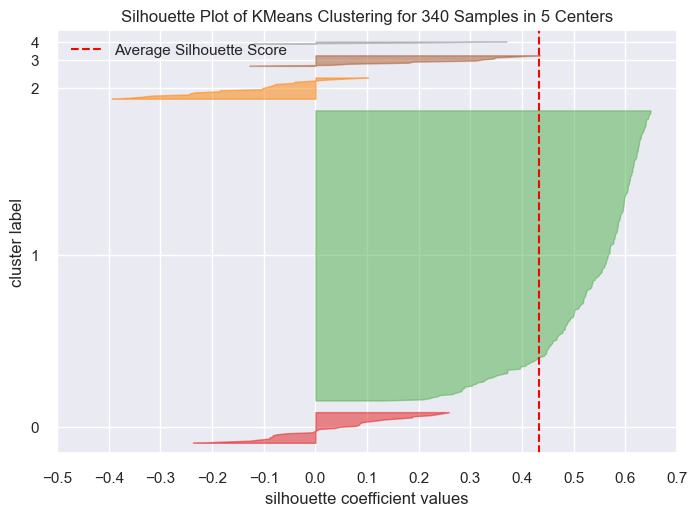

In [167]:
# finding optimal no. of clusters with silhouette coefficients
visualizer5 = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer5.fit(subset_scaled_df)
visualizer5.show();

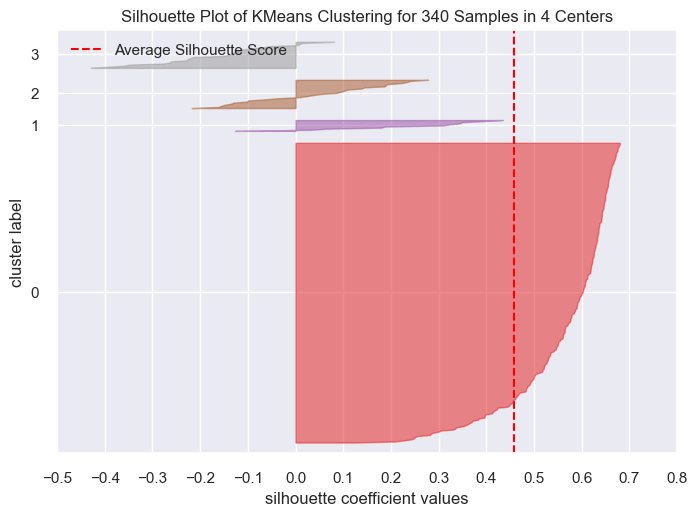

In [168]:
# finding optimal no. of clusters with silhouette coefficients
visualizer4 = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer4.fit(subset_scaled_df)
visualizer4.show();

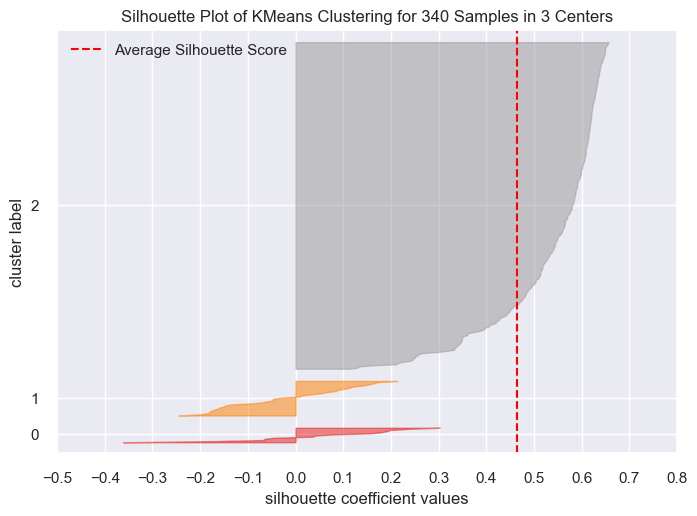

In [221]:
# finding optimal no. of clusters with silhouette coefficients
visualizer3 = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer3.fit(subset_scaled_df)
visualizer3.show();

**Since all the SilhouetteVisualizer plot for K= 3,4,5,6,7,9 have negative values and major chunk of data
lies in one particular cluster, will use K=5 for final model**

### Creating Final Model

In [170]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=5, random_state=0)

In [223]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
#k_means_df["KM_segments"] = kmeans.labels_
df["K_means_segments"] = kmeans.labels_
df.head()

Ticker Symbol             GICS Sector      GICS Sub Industry  Current Price  \
0           AAL             Industrials               Airlines      42.349998   
1          ABBV             Health Care        Pharmaceuticals      59.240002   
2           ABT             Health Care  Health Care Equipment      44.910000   
3          ADBE  Information Technology   Application Software      93.940002   
4           ADI  Information Technology         Semiconductors      55.320000   

   Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  \
0      9.999995    1.687151  135          51     -604000000  7610000000   
1      8.339433    2.197887  130          77       51000000  5144000000   
2     11.301121    1.273646   21          67      938000000  4423000000   
3     13.977195    1.357679    9         180     -240840000   629551000   
4     -1.827858    1.701169   14         272      315120000   696878000   

   Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  P/B Ratio  \
0               11.39                  6.681299e+08    3.718174  -8.784219   
1                3.15                  1.633016e+09   18.806350  -8.750068   
2                2.94                  1.504422e+09   15.275510  -0.394171   
3                1.26                  4.996437e+08   74.555557   4.199651   
4                0.31                  2.247994e+09  178.451613   1.059810   

   K_means_segments  
0                 4  
1                 4  
2                 4  
3                 4  
4                 0

In [201]:
df["K_means_segments"].value_counts()

4    259
1     35
0     24
2     13
3      9
Name: K_means_segments, dtype: int64

### Cluster Profiling

In [307]:
km_cluster_profile = df.groupby("K_means_segments").mean()

In [308]:
km_cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Current Price"].count().values 
)

In [309]:
# let's display cluster profiles
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [211]:
for cl in df["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df[df["K_means_segments"] == cl]["Ticker Symbol"].unique())
    print()

In cluster 4, the following companies are present:
['AAL' 'ABBV' 'ABT' 'ADBE' 'ADM' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV' 'AIZ' 'AJG'
 'ALB' 'ALK' 'ALL' 'AMAT' 'AME' 'AMG' 'AMP' 'AMT' 'AN' 'ANTM' 'AON' 'APH'
 'ATVI' 'AVB' 'AVGO' 'AWK' 'AXP' 'BA' 'BAX' 'BBT' 'BCR' 'BK' 'BLL' 'BMY'
 'BSX' 'BWA' 'BXP' 'CAT' 'CB' 'CBG' 'CCI' 'CCL' 'CFG' 'CHD' 'CHRW' 'CI'
 'CINF' 'CMA' 'CME' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COO' 'CSX' 'CTL' 'CTSH'
 'CTXS' 'CVS' 'CVX' 'D' 'DAL' 'DD' 'DE' 'DFS' 'DGX' 'DHR' 'DIS' 'DISCA'
 'DISCK' 'DLPH' 'DLR' 'DNB' 'DOV' 'DPS' 'DUK' 'DVA' 'EBAY' 'ECL' 'ED'
 'EFX' 'EIX' 'EMN' 'EQR' 'ES' 'ESS' 'ETFC' 'ETN' 'ETR' 'EXC' 'EXPD' 'EXPE'
 'EXR' 'FAST' 'FBHS' 'FE' 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS' 'FMC' 'FRT' 'GD'
 'GGP' 'GLW' 'GM' 'GPC' 'GRMN' 'GT' 'GWW' 'HAS' 'HBAN' 'HCA' 'HCN' 'HCP'
 'HIG' 'HOG' 'HON' 'HPQ' 'HRL' 'HSIC' 'HST' 'HSY' 'HUM' 'IBM' 'IDXX' 'IFF'
 'IP' 'IPG' 'IRM' 'ITW' 'IVZ' 'JBHT' 'JEC' 'JNPR' 'KIM' 'LEG' 'LEN' 'LH'
 'LKQ' 'LLL' 'LLY' 'LMT' 'LNT' 'LUV' 'LVLT' 'LYB' 'MA' 'MAA' 'MAC' 

In [212]:
df.groupby(["K_means_segments", "GICS Sector"])["Ticker Symbol"].count()

K_means_segments  GICS Sector                
0                 Consumer Discretionary          6
                  Consumer Staples                1
                  Health Care                     9
                  Information Technology          6
                  Real Estate                     1
                  Telecommunications Services     1
1                 Consumer Discretionary          1
                  Energy                         20
                  Financials                      1
                  Industrials                     4
                  Information Technology          4
                  Materials                       5
2                 Consumer Discretionary          1
                  Consumer Staples                1
                  Energy                          1
                  Financials                      4
                  Health Care                     3
                  Information Technology          1
                  

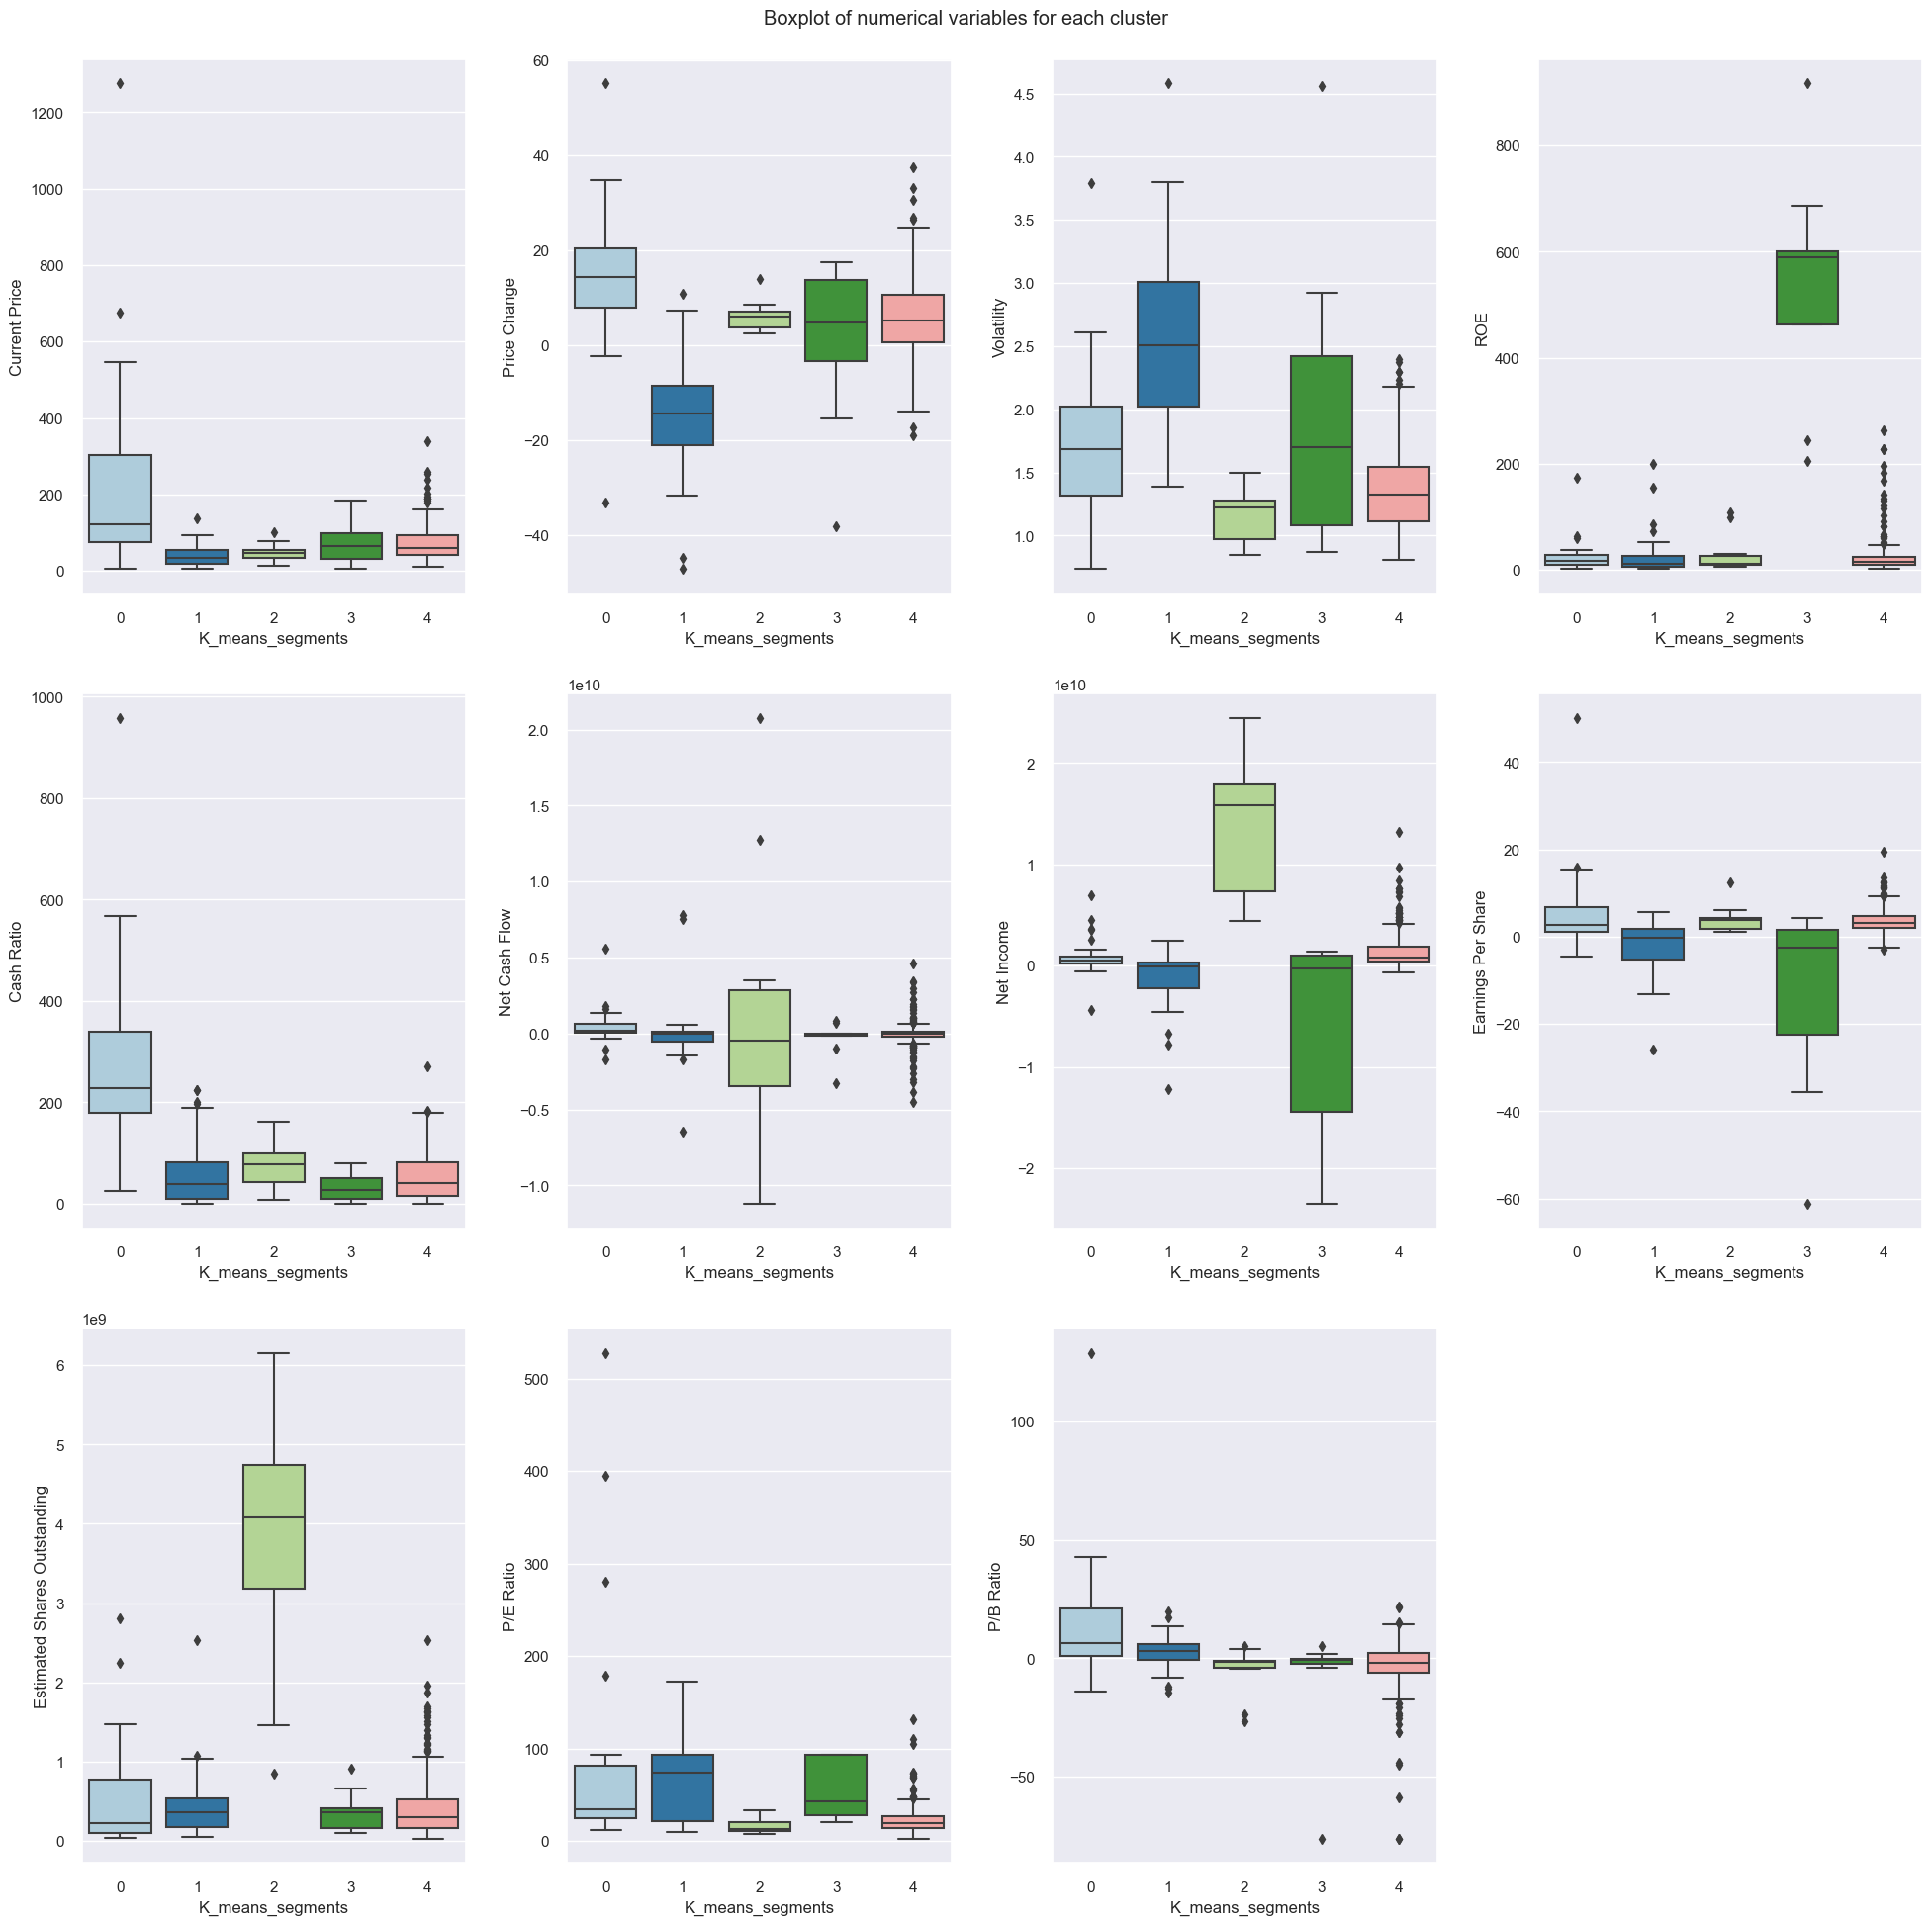

In [217]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable, palette = 'Paired')

plt.tight_layout(pad=2.0)

### Insights

**Cluster 0**

1.  In cluster 0, the following companies are present:

['ADI' 'ADS' 'ALXN' 'AMGN' 'AMZN' 'BIIB' 'CELG' 'CMG' 'EQIX' 'EW' 'FB'
 'FSLR' 'FTR' 'ISRG' 'MCD' 'MNST' 'NFLX' 'PCLN' 'REGN' 'TRIP' 'VRTX' 'WAT'
 'WYNN' 'YHOO']

2. The sectors included in this have total 24 securities and 6 GICS sectos.

- Consumer Discretionary          6 
- Consumer Staples                1
- Health Care                     9
- Information Technology          6
- Real Estate                     1
- Telecommunications Services     1

3. The cash ratio of this cluster is significantly higher than other clusters with quite high median of 220.
4. The current price for this cluster is quite higher than other cluster with maximum current price ~1200.
5. The P/E ratio is quite high for outliers in this cluster, whereas 25% of companies P/B ratio is higher than all sector.
6. This cluster have low to medium volatility. 

**Cluster 1**

1. In cluster 1, the following companies are present:

['AKAM' 'APC' 'ARNC' 'BHI' 'CF' 'COG' 'CXO' 'EOG' 'EQT' 'FCX' 'HAL' 'HES'
 'HPE' 'KMI' 'KSU' 'LUK' 'MLM' 'MOS' 'MRO' 'MUR' 'NBL' 'NEM' 'NOV' 'OKE'
 'OXY' 'PWR' 'R' 'RRC' 'SE' 'SWKS' 'SWN' 'TDC' 'UAA' 'WMB' 'XEC']
 
 
2. The sectors included in this have total 35 securities and 6 GICS sectors.           
- Consumer Discretionary          1
- Energy                         20
- Financials                      1
- Industrials                     4
- Information Technology          4
- Materials                       5

3. The price change percentage of this cluster is mostly in negative zone, indicating most stocks are loosing money.
4. The volatility of 50% of stocks in this cluster is above 2.5.
5. The net income and earning per share are in negative zone for more than 50% of stock in cluster.
6. Despite negative EPS for 75% companies, atleast 25% companies in this cluster have P/E ratio >100.


**Cluster 2**

1. In cluster 2, the following companies are present:
['BAC' 'C' 'F' 'GILD' 'INTC' 'JPM' 'KO' 'MRK' 'PFE' 'T' 'VZ' 'WFC' 'XOM']

2. 2. The sectors included in this have total 12 securities and 7 GICS sectors.
- Consumer Discretionary          1
- Consumer Staples                1
- Energy                          1
- Financials                      4
- Health Care                     3
- Information Technology          1
- Telecommunications Services     2

3. 75% of companies in this clusters higher estimated shares outstanding than all other clusters.
4. The net cash flow for this cluster is wide distribution with 50% of companies in negative zone.
5. Despite negative cash flow for few companies, all the companies have positive net income and higher than other cluster.
6. The price change is within 15% and this is least volatile cluster of stocks as compared to other clusters.
7. The P/E ratio is quite low for stocks in this clusters suggesting bargain price of stocks.


**Cluster 3**:
    
1. In cluster 3, the following companies are present:

['ALLE' 'APA' 'CHK' 'CHTR' 'CL' 'DVN' 'KMB' 'NFX' 'SPGI']

2. The sectors included in this have just 9 securities and 5 GICS sectors.

- Consumer Discretionary          1
- Consumer Staples                2
- Energy                          4
- Financials                      1
- Industrials                     1

3. The EPS for 50% companies is negative suggesting negtive outlook of the company.
4. The net income for this cluster is wide distribution with atleast 75% companies lying in negative zone.
5. The ROE is between 400-600 and higher than all the cluster.
6. The price change range from -20% to 20% suggesting high volatility for few companies. 
7. The volatily distributions of stocks in this cluster is wide and more than 50% of stocks have volatility >1.5

**Cluster 4**

1. In cluster 4, the following companies are present:

['AAL' 'ABBV' 'ABT' 'ADBE' 'ADM' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV' 'AIZ' 'AJG'
 'ALB' 'ALK' 'ALL' 'AMAT' 'AME' 'AMG' 'AMP' 'AMT' 'AN' 'ANTM' 'AON' 'APH'
 'ATVI' 'AVB' 'AVGO' 'AWK' 'AXP' 'BA' 'BAX' 'BBT' 'BCR' 'BK' 'BLL' 'BMY'
 'BSX' 'BWA' 'BXP' 'CAT' 'CB' 'CBG' 'CCI' 'CCL' 'CFG' 'CHD' 'CHRW' 'CI'
 'CINF' 'CMA' 'CME' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COO' 'CSX' 'CTL' 'CTSH'
 'CTXS' 'CVS' 'CVX' 'D' 'DAL' 'DD' 'DE' 'DFS' 'DGX' 'DHR' 'DIS' 'DISCA'
 'DISCK' 'DLPH' 'DLR' 'DNB' 'DOV' 'DPS' 'DUK' 'DVA' 'EBAY' 'ECL' 'ED'
 'EFX' 'EIX' 'EMN' 'EQR' 'ES' 'ESS' 'ETFC' 'ETN' 'ETR' 'EXC' 'EXPD' 'EXPE'
 'EXR' 'FAST' 'FBHS' 'FE' 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS' 'FMC' 'FRT' 'GD'
 'GGP' 'GLW' 'GM' 'GPC' 'GRMN' 'GT' 'GWW' 'HAS' 'HBAN' 'HCA' 'HCN' 'HCP'
 'HIG' 'HOG' 'HON' 'HPQ' 'HRL' 'HSIC' 'HST' 'HSY' 'HUM' 'IBM' 'IDXX' 'IFF'
 'IP' 'IPG' 'IRM' 'ITW' 'IVZ' 'JBHT' 'JEC' 'JNPR' 'KIM' 'LEG' 'LEN' 'LH'
 'LKQ' 'LLL' 'LLY' 'LMT' 'LNT' 'LUV' 'LVLT' 'LYB' 'MA' 'MAA' 'MAC' 'MAR'
 'MAS' 'MAT' 'MCO' 'MDLZ' 'MET' 'MHK' 'MJN' 'MKC' 'MMC' 'MMM' 'MO' 'MPC'
 'MTB' 'MTD' 'MYL' 'NAVI' 'NDAQ' 'NEE' 'NLSN' 'NSC' 'NTRS' 'NUE' 'NWL' 'O'
 'OMC' 'ORLY' 'PBCT' 'PBI' 'PCAR' 'PCG' 'PEG' 'PEP' 'PFG' 'PG' 'PGR' 'PHM'
 'PM' 'PNC' 'PNR' 'PNW' 'PPG' 'PPL' 'PRU' 'PSX' 'PX' 'PYPL' 'RCL' 'RHI'
 'ROP' 'RSG' 'SCG' 'SCHW' 'SEE' 'SHW' 'SLG' 'SNI' 'SO' 'SPG' 'SRCL' 'SRE'
 'STI' 'STT' 'SYF' 'SYK' 'TAP' 'TGNA' 'TMK' 'TMO' 'TRV' 'TSCO' 'TSN' 'TSO'
 'TSS' 'TXN' 'UAL' 'UDR' 'UHS' 'UNH' 'UNM' 'UNP' 'UPS' 'UTX' 'VAR' 'VLO'
 'VMC' 'VNO' 'VRSK' 'VRSN' 'VTR' 'WEC' 'WHR' 'WM' 'WU' 'WY' 'WYN' 'XEL'
 'XL' 'XRAY' 'XRX' 'XYL' 'YUM' 'ZBH' 'ZION' 'ZTS']

2. The sectors included in this have total 259 securities and 11 GICS sectors.

- Consumer Discretionary         31
- Consumer Staples               15
- Energy                          5
- Financials                     43
- Health Care                    28
- Industrials                    48
- Information Technology         22
- Materials                      15
- Real Estate                    26
- Telecommunications Services     2
- Utilities                      24

3. The sector quite Low P/E ratios < 50  which reflects stocks are not expensive.
4. 75% of stocks in this cluster have positive net income.
5. Too many outliers for netcash flow which is quite squeezed distribution around 0.
6. The price change range from -20% to 40% which suggests low to high volatility.

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [229]:
hc_df = subset_scaled_df.copy()

In [226]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correl

**Let's explore different linkage methods with Euclidean distance only.**

In [230]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

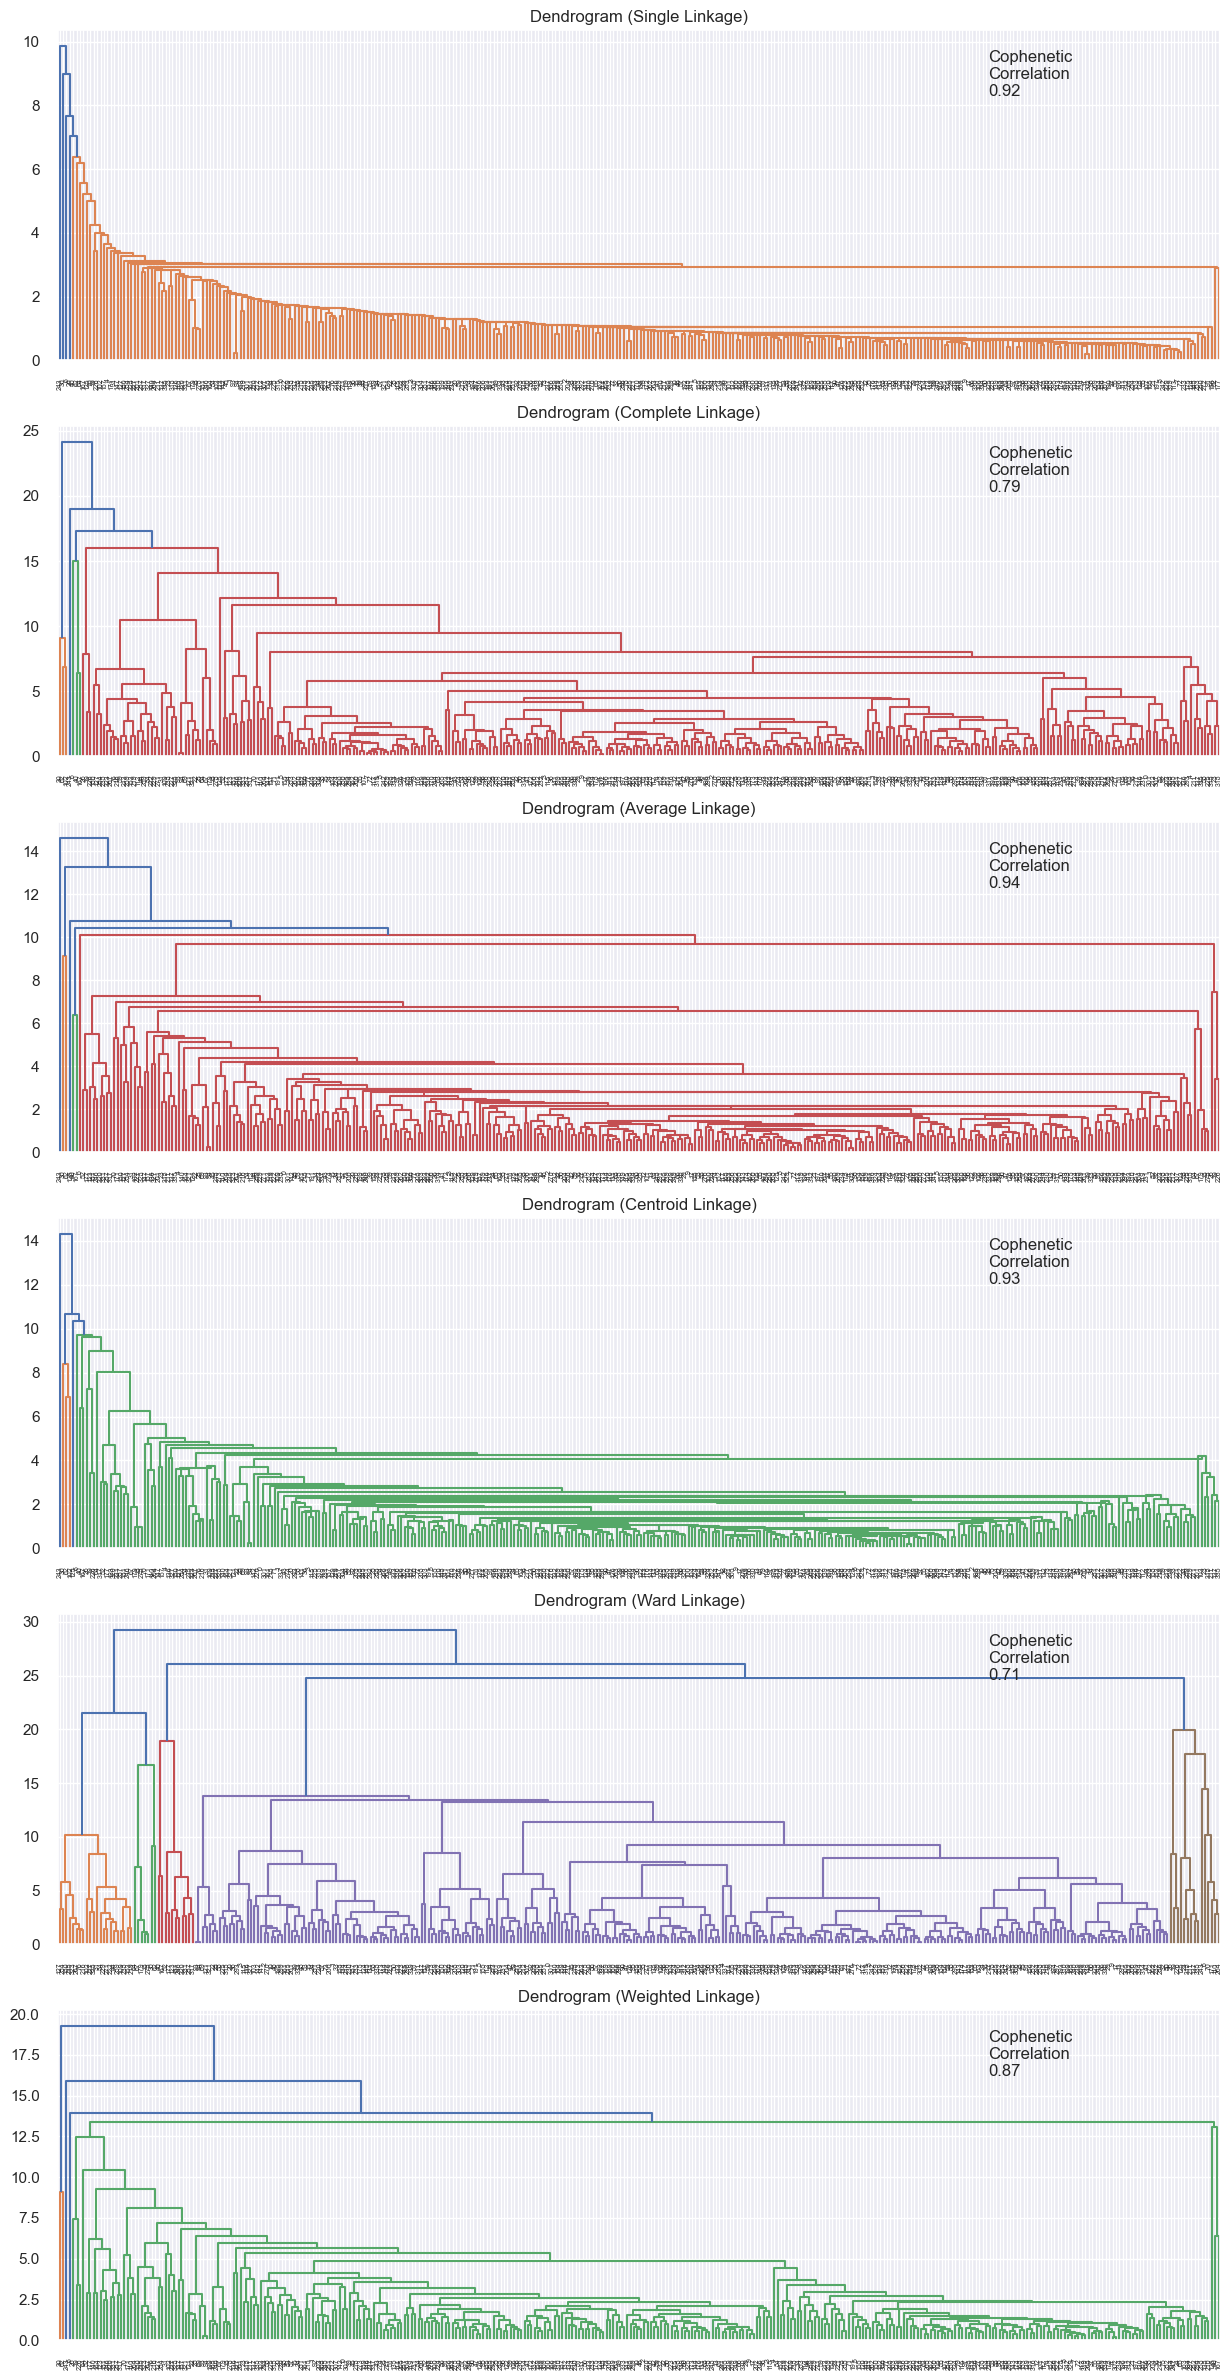

In [233]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

In [ ]:
**Observations**

1. The cophenetic correlation is highest for average and centroid linkage methods.
2. We will move ahead with average linkage as its slightly higher cophentic correlation than centroid linkage method
3. 5 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [297]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

Empty DataFrame
Columns: [Linkage, Cophenetic Coefficient]
Index: []

### Creating model using sklearn

##### Average linkage method

In [288]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [290]:
# creating a copy of the original data
df2 = df1.drop(['K_means_segments'], axis=1)
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_
df2.head()

Ticker Symbol             GICS Sector      GICS Sub Industry  Current Price  \
0           AAL             Industrials               Airlines      42.349998   
1          ABBV             Health Care        Pharmaceuticals      59.240002   
2           ABT             Health Care  Health Care Equipment      44.910000   
3          ADBE  Information Technology   Application Software      93.940002   
4           ADI  Information Technology         Semiconductors      55.320000   

   Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  \
0      9.999995    1.687151  135          51     -604000000  7610000000   
1      8.339433    2.197887  130          77       51000000  5144000000   
2     11.301121    1.273646   21          67      938000000  4423000000   
3     13.977195    1.357679    9         180     -240840000   629551000   
4     -1.827858    1.701169   14         272      315120000   696878000   

   Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  P/B Ratio  \
0               11.39                  6.681299e+08    3.718174  -8.784219   
1                3.15                  1.633016e+09   18.806350  -8.750068   
2                2.94                  1.504422e+09   15.275510  -0.394171   
3                1.26                  4.996437e+08   74.555557   4.199651   
4                0.31                  2.247994e+09  178.451613   1.059810   

   HC_Clusters  
0            0  
1            0  
2            0  
3            0  
4            0

### Cluster Profiling

In [284]:
hc_cluster_profile = df2.groupby("HC_Clusters").mean()

In [285]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_Clusters")["Current Price"].count().values 
)

In [286]:
# let's display cluster profiles
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

**There is one big cluster of 335 companies, 3 clusters of one company, 1 clusters of two companies.
As this clustering has not achieved anything lets try Ward linkeage methods as its Dendogram it looks widely distributed.**

##### Ward Linkeage Method

In [287]:
HCmodel_ward = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel_ward.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [292]:
# creating a copy of the original data
df3 = df1.drop(['K_means_segments'], axis=1)
subset_scaled_df["HC_Clusters"] = HCmodel_ward.labels_
df3["HC_Clusters"] = HCmodel_ward.labels_
df3.head()

Ticker Symbol             GICS Sector      GICS Sub Industry  Current Price  \
0           AAL             Industrials               Airlines      42.349998   
1          ABBV             Health Care        Pharmaceuticals      59.240002   
2           ABT             Health Care  Health Care Equipment      44.910000   
3          ADBE  Information Technology   Application Software      93.940002   
4           ADI  Information Technology         Semiconductors      55.320000   

   Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  \
0      9.999995    1.687151  135          51     -604000000  7610000000   
1      8.339433    2.197887  130          77       51000000  5144000000   
2     11.301121    1.273646   21          67      938000000  4423000000   
3     13.977195    1.357679    9         180     -240840000   629551000   
4     -1.827858    1.701169   14         272      315120000   696878000   

   Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  P/B Ratio  \
0               11.39                  6.681299e+08    3.718174  -8.784219   
1                3.15                  1.633016e+09   18.806350  -8.750068   
2                2.94                  1.504422e+09   15.275510  -0.394171   
3                1.26                  4.996437e+08   74.555557   4.199651   
4                0.31                  2.247994e+09  178.451613   1.059810   

   HC_Clusters  
0            0  
1            0  
2            0  
3            0  
4            0

### Cluster Profiling

In [293]:
hc_cluster_ward = df3.groupby("HC_Clusters").mean()

In [294]:
hc_cluster_ward["count_in_each_segment"] = (
    df3.groupby("HC_Clusters")["Current Price"].count().values 
)

In [296]:
# let's display cluster profiles
hc_cluster_ward.style.highlight_max(color="lightgreen", axis=0)

**This is quite similar to K-means clustering with 5 clusters and will continue with this one.**

In [298]:
for cl in df3["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df3[df3["HC_Clusters"] == cl]["Ticker Symbol"].unique())
    print()

In cluster 0, the following companies are present:
['AAL' 'ABBV' 'ABT' 'ADBE' 'ADI' 'ADM' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV' 'AIZ'
 'AJG' 'AKAM' 'ALB' 'ALK' 'ALL' 'AMAT' 'AME' 'AMG' 'AMGN' 'AMP' 'AMT' 'AN'
 'ANTM' 'AON' 'APH' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AWK' 'AXP' 'BA' 'BAC'
 'BAX' 'BBT' 'BCR' 'BIIB' 'BK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'CAT' 'CB'
 'CBG' 'CCI' 'CCL' 'CELG' 'CF' 'CFG' 'CHD' 'CHRW' 'CI' 'CINF' 'CMA' 'CME'
 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COO' 'CSX' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX'
 'D' 'DAL' 'DD' 'DE' 'DFS' 'DGX' 'DHR' 'DIS' 'DISCA' 'DISCK' 'DLPH' 'DLR'
 'DNB' 'DOV' 'DPS' 'DUK' 'DVA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'EMN' 'EQR'
 'EQT' 'ES' 'ESS' 'ETFC' 'ETN' 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE' 'EXR' 'FAST'
 'FB' 'FBHS' 'FE' 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS' 'FMC' 'FRT' 'FSLR' 'FTR'
 'GD' 'GGP' 'GILD' 'GLW' 'GM' 'GPC' 'GRMN' 'GT' 'GWW' 'HAL' 'HAS' 'HBAN'
 'HCA' 'HCN' 'HCP' 'HIG' 'HOG' 'HON' 'HPE' 'HPQ' 'HRL' 'HSIC' 'HST' 'HSY'
 'HUM' 'IBM' 'IDXX' 'IFF' 'INTC' 'IP' 'IPG' 'IRM' 'ITW' 'IVZ' 'J

In [302]:
df3.groupby(["HC_Clusters", "GICS Sector"])["Ticker Symbol"].count()

HC_Clusters  GICS Sector                
0            Consumer Discretionary         35
             Consumer Staples               16
             Energy                          7
             Financials                     45
             Health Care                    36
             Industrials                    52
             Information Technology         30
             Materials                      19
             Real Estate                    26
             Telecommunications Services     3
             Utilities                      24
1            Consumer Discretionary          3
             Health Care                     3
             Information Technology          2
             Real Estate                     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     1
             Teleco

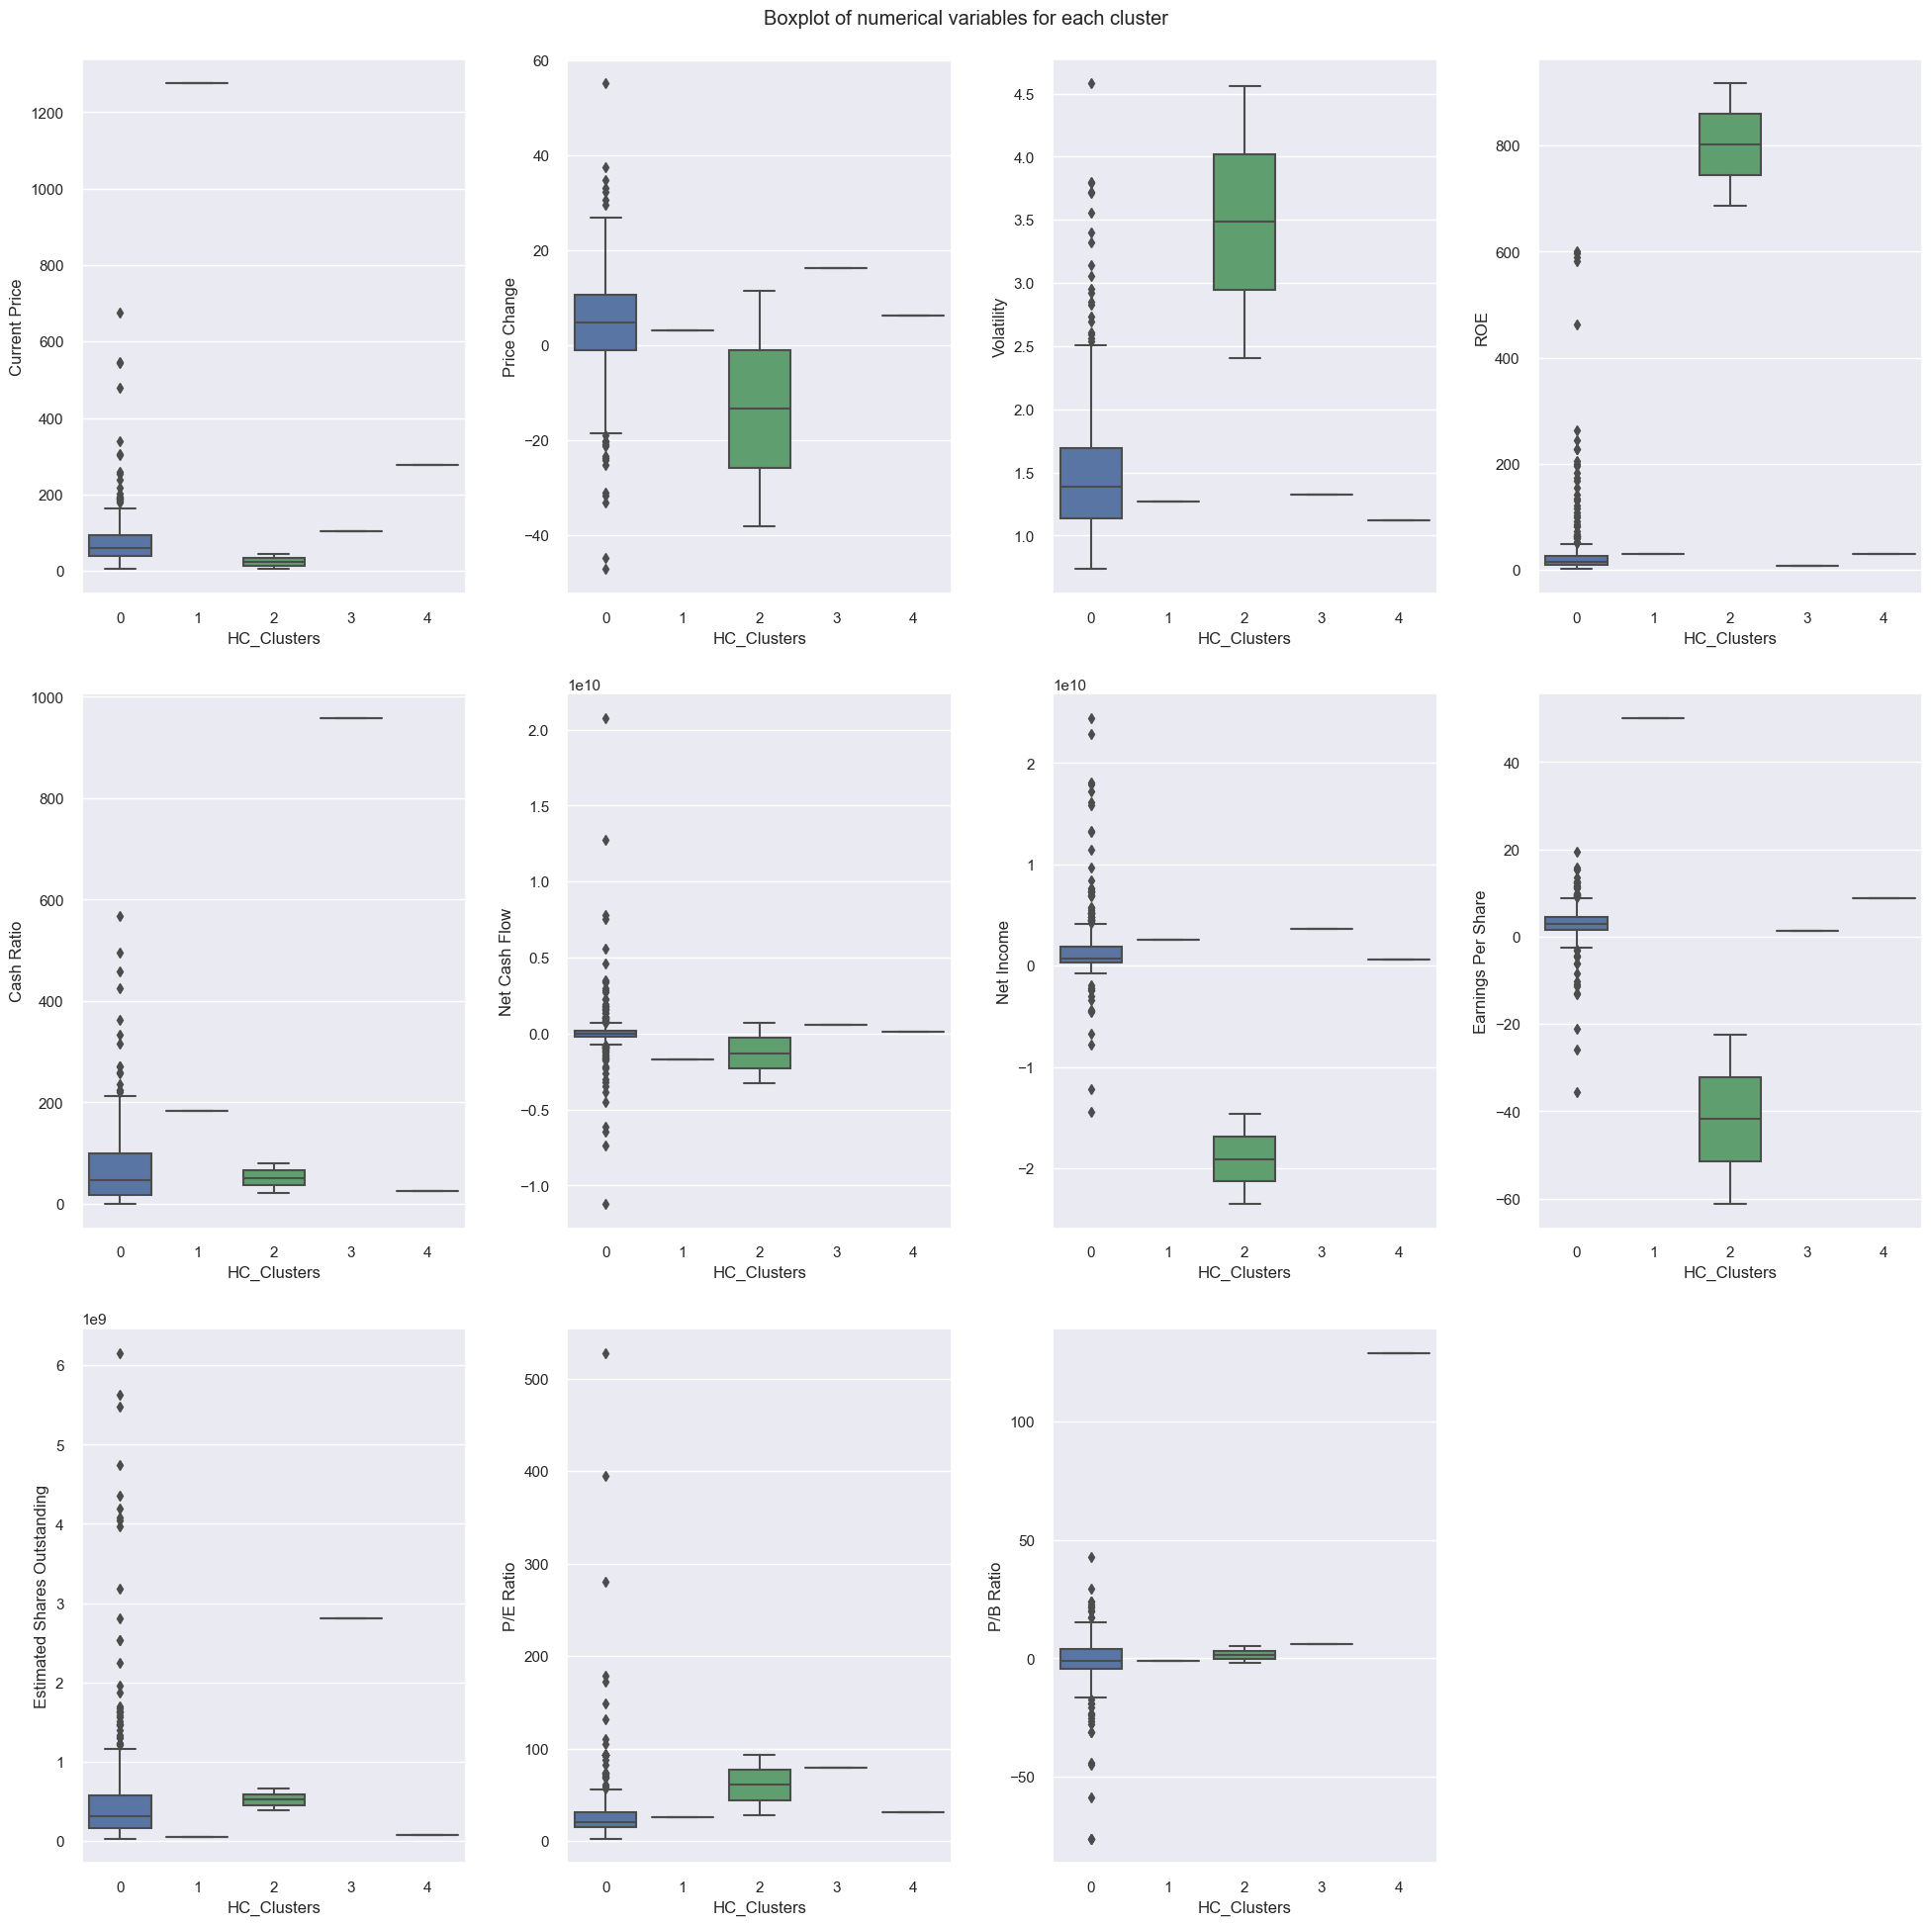

In [303]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)


### Insights

**Cluster 0**

1. In cluster 0, the following companies are present:
    
['AAL' 'ABBV' 'ABT' 'ADBE' 'ADI' 'ADM' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV' 'AIZ'
 'AJG' 'AKAM' 'ALB' 'ALK' 'ALL' 'AMAT' 'AME' 'AMG' 'AMGN' 'AMP' 'AMT' 'AN'
 'ANTM' 'AON' 'APH' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AWK' 'AXP' 'BA' 'BAC'
 'BAX' 'BBT' 'BCR' 'BIIB' 'BK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'CAT' 'CB'
 'CBG' 'CCI' 'CCL' 'CELG' 'CF' 'CFG' 'CHD' 'CHRW' 'CI' 'CINF' 'CMA' 'CME'
 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COO' 'CSX' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX'
 'D' 'DAL' 'DD' 'DE' 'DFS' 'DGX' 'DHR' 'DIS' 'DISCA' 'DISCK' 'DLPH' 'DLR'
 'DNB' 'DOV' 'DPS' 'DUK' 'DVA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'EMN' 'EQR'
 'EQT' 'ES' 'ESS' 'ETFC' 'ETN' 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE' 'EXR' 'FAST'
 'FB' 'FBHS' 'FE' 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS' 'FMC' 'FRT' 'FSLR' 'FTR'
 'GD' 'GGP' 'GILD' 'GLW' 'GM' 'GPC' 'GRMN' 'GT' 'GWW' 'HAL' 'HAS' 'HBAN'
 'HCA' 'HCN' 'HCP' 'HIG' 'HOG' 'HON' 'HPE' 'HPQ' 'HRL' 'HSIC' 'HST' 'HSY'
 'HUM' 'IBM' 'IDXX' 'IFF' 'INTC' 'IP' 'IPG' 'IRM' 'ITW' 'IVZ' 'JBHT' 'JEC'
 'JNPR' 'KIM' 'KSU' 'LEG' 'LEN' 'LH' 'LKQ' 'LLL' 'LLY' 'LMT' 'LNT' 'LUK'
 'LUV' 'LVLT' 'LYB' 'MA' 'MAA' 'MAC' 'MAR' 'MAS' 'MAT' 'MCD' 'MCO' 'MDLZ'
 'MET' 'MHK' 'MJN' 'MKC' 'MLM' 'MMC' 'MMM' 'MNST' 'MO' 'MOS' 'MPC' 'MRK'
 'MTB' 'MTD' 'MYL' 'NAVI' 'NDAQ' 'NEE' 'NEM' 'NLSN' 'NSC' 'NTRS' 'NUE'
 'NWL' 'O' 'OMC' 'ORLY' 'PBCT' 'PBI' 'PCAR' 'PCG' 'PEG' 'PEP' 'PFG' 'PG'
 'PGR' 'PHM' 'PM' 'PNC' 'PNR' 'PNW' 'PPG' 'PPL' 'PRU' 'PSX' 'PWR' 'PX'
 'PYPL' 'R' 'RCL' 'RHI' 'ROP' 'RSG' 'SCG' 'SCHW' 'SEE' 'SHW' 'SLG' 'SNI'
 'SO' 'SPG' 'SRCL' 'SRE' 'STI' 'STT' 'SWKS' 'SYF' 'SYK' 'TAP' 'TGNA' 'TMK'
 'TMO' 'TRIP' 'TRV' 'TSCO' 'TSN' 'TSO' 'TSS' 'TXN' 'UAA' 'UAL' 'UDR' 'UHS'
 'UNH' 'UNM' 'UNP' 'UPS' 'UTX' 'VAR' 'VLO' 'VMC' 'VNO' 'VRSK' 'VRSN'
 'VRTX' 'VTR' 'WAT' 'WEC' 'WHR' 'WM' 'WU' 'WY' 'WYN' 'WYNN' 'XEL' 'XL'
 'XRAY' 'XRX' 'XYL' 'YHOO' 'YUM' 'ZBH' 'ZION' 'ZTS']

2. The sectors included include 293 securities and 11 GICS sectors.    
- Consumer Discretionary         35
- Consumer Staples               16
- Energy                          7
- Financials                     45
- Health Care                    36
- Industrials                    52
- Information Technology         30
- Materials                      19
- Real Estate                    26
- Telecommunications Services    3
- Utilities                      24

3. This cluster has wide price range change from -60% to 60% which signifies very high for 50% of stocks in clusters.
4. The estimated outstanding share and cash ratio has too many outliers.
5. THE net income and EPS is positive for 75% of companies in the cluster.

**Cluster 1**

1. In cluster 1, the following companies are present:
    
['ADS' 'ALXN' 'AMZN' 'CMG' 'EQIX' 'ISRG' 'NFLX' 'PCLN' 'REGN']

2. The sectors included include 9 securities and 4 GICS sectors. 
- Consumer Discretionary    3
- Health Care               3
- Information Technology    2
- Real Estate               1

3. P/B ratio of these 9 stocks in ~0.
4. Quite Low price change and low volatility for this cluster.
5. EPS is > 40 quite higher than all clusters.
6. The current price is way higher than other cluster and above 1200.

**CLusters 2**
1. In cluster 2, the following companies are present:
    
['C' 'F' 'JPM' 'KO' 'PFE' 'T' 'VZ' 'WFC' 'XOM']

2. The sectors included include 9 securities and 6 GICS sectors.
- Consumer Discretionary          1
- Consumer Staples                1
- Energy                          1
- Financials                      3
- Health Care                     1
- Telecommunications Services     2

3. Price change % varies from -40 to 15%  therefore very high volatility for this cluster.
4. All the stocks have negative net income out of all clusters.
5. The EPS lies in -20 to -60 entirely in negative zone and way lower than all other cluster
6. As EPS is negative ROE is very high with median ~800.

**Clusters 3**

1.In cluster 3, the following companies are present:

['ALLE' 'APA' 'CHK' 'CHTR' 'CL' 'KMB' 'SPGI']

2. The sectors included include 9 securities and 5 GICS sectors.
- Consumer Discretionary          1
- Consumer Staples                2
- Energy                          2
- Financials                      1
- Industrials                     1

3. The estimated share outstanding are quite high.
4. The cash ratio is very high ~ 950 quite higher than all other clusters.
5. The EPS of this cluster ~ 0 

**Clusters 4**:
1. In cluster 4, the following companies are present:
    
['APC' 'BHI' 'COG' 'CXO' 'DVN' 'EOG' 'FCX' 'HES' 'KMI' 'MRO' 'MUR' 'NBL'
 'NFX' 'NOV' 'OKE' 'OXY' 'RRC' 'SE' 'SWN' 'TDC' 'WMB' 'XEC']

2. The sectors included include 22 securities and 3 GICS sectors.
- Energy                         20
- Information Technology          1
- Materials                       1

3. The P/B ratio quite high > 140 compared to other clusters.


## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

**Which clustering technique took less time for execution?**

Both K-Means model and the Agglomerative Clustering model took just few seconds to create the clusters.

**Which clustering technique gave you more distinct clusters, or are they the same?**

We used 5 clusters for both models. Both models have one big clusters with above 250 companies but K mean model has distict distribution of stocks within 4 models and able to clusters stocks on distinct properties better than Agglomerative clustering.

**How many observations are there in the similar clusters of both algorithms?**

As there is one big cluster of 250 above stocks in both models, there are quite many companies in big cluster. K-mean Cluster 3rd have very high ROE like Cluster 2 of Agglomerative model.

**How many clusters are obtained as the appropriate number of clusters from both algorithms?**

For K-mean 5 clusters are selected from high silhouette scores and elbow method. For Agglomerative clustering 5 clusters are chosen on based on dendogram.

**Differences or similarities you obtained in the cluster profiles from both the clustering techniques**.

Altough both K-model and Agglomerative clustering have 5 clusters, but there 4 smaller cluster are quite different on properties. Agglomerative clustering actually  clustered stocks based on one prominent parameter on which one cluster is quite distinct (very far away ) from other. 
K-mean clustering created clusters based on combination of distict properties which separated one cluster from other with some overlapping. But K mean clustering created clusters more distinctly for investing purpose.


## Actionable Insights and Recommendations

- As K-mean Clustering did able to clusters in terms of investing opportunities, Trade&Ahead can use these clusters to create mutual funds as starting point for investing and avoid stocks which are not doing well in 13 week times.

   ~ **Cluster 0** : High Cash ratio ; P/E ratio is high so slightly expansive; High current price; low to medium volatility.
     This clusters have good stocks but might be little overprised right now.
 
   ~ **Cluster 1** : Negative price change ; High volatile; Negative EPS and income.
     Despite negative EPS, few stocks have P/E ratio >100, indicating investors are willing to pay higher price for these stock

   ~ **Cluster 2** : High estimated outstanding shares; Negative net cash flow for 50% companies; Net positive net income;           Low volatile stocks; Low P/E ratio.
     With net postitive income despite negative cash flow, these stocks are at bargain price for such low P/E ratio.

   ~ **Cluster 3** : Very negative outlook; Negative EPS; Very High ROS; High Volatile stocks; Negative Net income
     This cluster constitute most poor performing stocks with very bleak outlook.

   ~ **Cluster 4**: Low P/E ratio; Net positive income; Wide Price change; Quite Volatile.
     This cluster contain 259 stocks and furthur clustering could be done to separate stocks on volatility.
     

 - Depending upon financial goals and risk tolerance behaviour of clients, these clusters could be added to their portfolio. 
 
 - Trade&Ahead can use these clusters and can create mutual funds or ETFs (exchange trading funds )based on them to be used as combination investment tool.
 
 - Based on clustering, and overall performance, worst perfroming stocks or clusters can slowly be removed from all portfolios. 
